In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#!pip install lasio

In [3]:
!pip install keras-tuner -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [4]:
!pip install scikeras -q


In [5]:
import time

In [6]:
start_notebook = time.time()

In [7]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#import lasio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy.stats import shapiro

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

import matplotlib.colors as colors
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


from sklearn.model_selection import GridSearchCV
from scipy.stats import norm

#Data

In [8]:
data = pd.read_csv("/content/drive/MyDrive/riset-fttm-gdrive/output.csv", sep=',')
data

,WELL,DEPT,CALI,DRHO,DT_MAA,GR,MR,SR,NPHI,PEF,...,PHIE,CEC,T,SWarchie,SWsimandoux,SWindonesia,SWwaxman,BVW,matrix,PERMtimur
0,LLB-10,4300.0,12.415,0.044,NaN,66.597,1.218,1.026,0.4272,3.013,...,0.556384,19.582381,100.688172,0.466597,0.032771,0.419736,(0.07694043183598935+0j),0.259607,-0.132099,3011.141846
1,LLB-10,4300.5,12.560,0.018,NaN,66.809,1.210,1.043,0.4326,2.916,...,0.560713,19.334772,100.692903,0.463601,0.031724,0.419319,(0.07670335166788751+0j),0.259947,-0.105713,3156.000294
2,LLB-10,4301.0,12.563,0.004,NaN,65.399,1.210,1.043,0.4481,2.845,...,0.542356,19.431351,100.697634,0.479383,0.036881,0.431594,(0.08053859967911665+0j),0.259996,-0.098070,2549.476977
3,LLB-10,4301.5,13.139,0.012,NaN,64.328,1.236,1.039,0.4469,2.600,...,0.527416,19.425253,100.702366,0.491709,0.041685,0.441622,(0.0837572197296535+0j),0.259335,-0.082416,2143.007324
4,LLB-10,4302.0,13.397,0.031,NaN,67.245,1.239,1.051,0.4317,2.478,...,0.567465,19.028144,100.707097,0.456512,0.030058,0.415179,(0.07554686318807682+0j),0.259054,-0.084250,3430.778118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,LLB-10,4698.0,12.810,0.149,NaN,71.371,1.929,1.518,0.4603,3.151,...,0.621683,19.161597,104.454194,0.375097,0.019172,0.332928,(0.05428300659664864+0j),0.233191,-0.383469,7592.465054
797,LLB-10,4698.5,12.733,0.155,NaN,72.914,2.032,1.567,0.4665,3.256,...,0.643493,19.028269,104.458925,0.367052,0.016427,0.326525,(0.052694184396998994+0j),0.236195,-0.416707,9227.937692
798,LLB-10,4699.0,13.073,0.163,NaN,70.924,2.097,1.578,0.4723,3.258,...,0.615786,18.877747,104.463656,0.388118,0.020174,0.343305,(0.05768111262274096+0j),0.238998,-0.400786,6800.320933
799,LLB-10,4699.5,12.815,0.171,NaN,69.881,1.926,1.466,0.4702,3.237,...,0.600843,18.785081,104.468387,0.402065,0.022621,0.354471,(0.06107049392525106+0j),0.241578,-0.392629,5687.498034


In [9]:
df=data[['CALI','DRHO','GR','MR','NPHI_corr','PEF','RHOB_CORR','ROP']]
df

,CALI,DRHO,GR,MR,NPHI_corr,PEF,RHOB_CORR,ROP
0,12.415,0.044,66.597,1.218,0.4272,3.013,2.318,274.659
1,12.560,0.018,66.809,1.210,0.4326,2.916,2.290,274.659
2,12.563,0.004,65.399,1.210,0.4481,2.845,2.265,274.659
3,13.139,0.012,64.328,1.236,0.4469,2.600,2.267,274.659
4,13.397,0.031,67.245,1.239,0.4317,2.478,2.276,319.478
...,...,...,...,...,...,...,...,...
796,12.810,0.149,71.371,1.929,0.4603,3.151,2.356,147.027
797,12.733,0.155,72.914,2.032,0.4665,3.256,2.350,147.027
798,13.073,0.163,70.924,2.097,0.4723,3.258,2.345,147.027
799,12.815,0.171,69.881,1.926,0.4702,3.237,2.353,147.027


#Exploratory Data Analysis

In [10]:
#Struktur Data
print("Dimensi DataFrame:", data.shape)
print("Kolom DataFrame:", data.columns)
print("Tipe Data:", data.dtypes)

Dimensi DataFrame: (801, 38)
Kolom DataFrame: Index(['WELL', 'DEPT', 'CALI', 'DRHO', 'DT_MAA', 'GR', 'MR', 'SR', 'NPHI',
       'PEF', 'RHOB_CORR', 'ROP', 'DR', 'RHOB', 'VSH', 'RW',
       'hydrocarbon_formation_class', 'NPHI_corr', 'VCLGR', 'VCLRT', 'VCLND',
       'VCL', 'PHID', 'PHIDshc', 'PHI_SIMANDOUX', 'PHIN', 'PHINshc', 'PHIxND',
       'PHIE', 'CEC', 'T', 'SWarchie', 'SWsimandoux', 'SWindonesia',
       'SWwaxman', 'BVW', 'matrix', 'PERMtimur'],
      dtype='object')
Tipe Data: WELL                            object
DEPT                           float64
CALI                           float64
DRHO                           float64
DT_MAA                         float64
GR                             float64
MR                             float64
SR                             float64
NPHI                           float64
PEF                            float64
RHOB_CORR                      float64
ROP                            float64
DR                             float64
RH

In [11]:
#Memeriksa Data yang Hilang
print("\nData yang Hilang:\n", df.isnull().sum())


Data yang Hilang:
 CALI         0
DRHO         0
GR           0
MR           0
NPHI_corr    0
PEF          0
RHOB_CORR    0
ROP          0
dtype: int64


In [12]:
#Statistik Deskriptif
print("\nStatistik Deskriptif:\n", df.describe(include='all'))


Statistik Deskriptif:
              CALI        DRHO          GR          MR   NPHI_corr         PEF  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean    12.852684    0.147918   64.987356    1.491302    0.431560    2.942056   
std      0.437300    0.085982    7.696345    0.765334    0.045783    0.404699   
min     11.723000   -0.059000   29.868000    0.880000    0.192200    1.903000   
25%     12.563000    0.090000   60.014000    1.264000    0.405400    2.719000   
50%     12.777000    0.133000   65.089000    1.314000    0.429600    2.884000   
75%     13.073000    0.183000   70.314000    1.408000    0.464300    3.128000   
max     14.745000    0.563000   88.665000    9.355000    0.544700    5.303000   

        RHOB_CORR         ROP  
count  801.000000  801.000000  
mean     2.340403  215.057337  
std      0.075401   77.373742  
min      2.097800   22.653000  
25%      2.294000  150.378000  
50%      2.334000  215.220000  
75%      2.378000  273

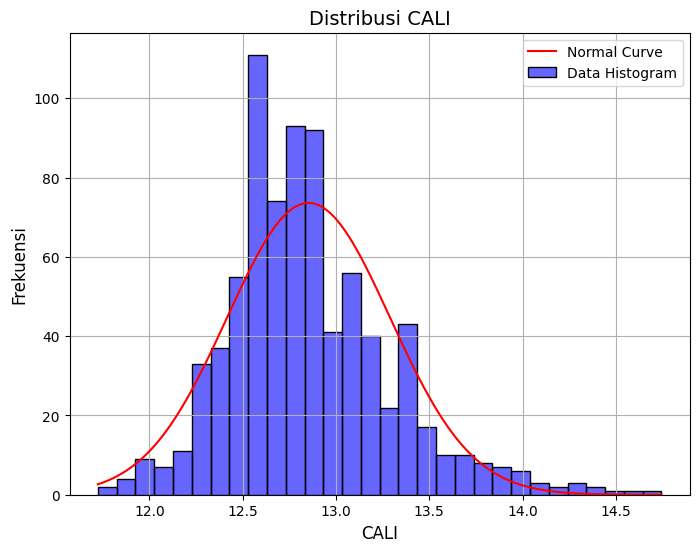

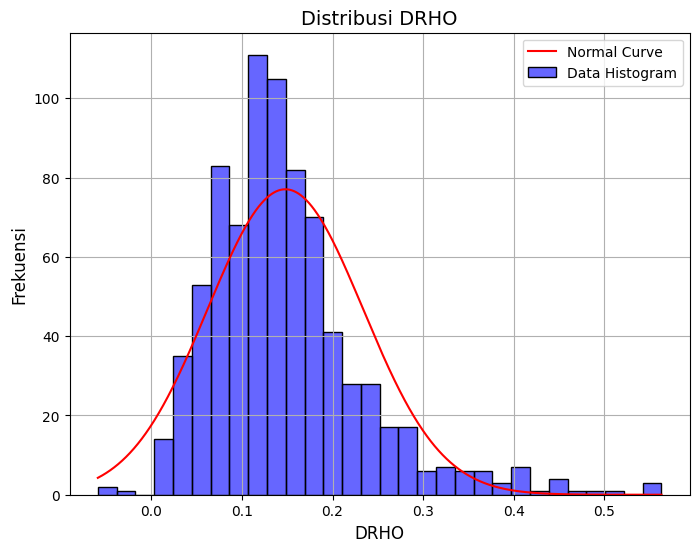

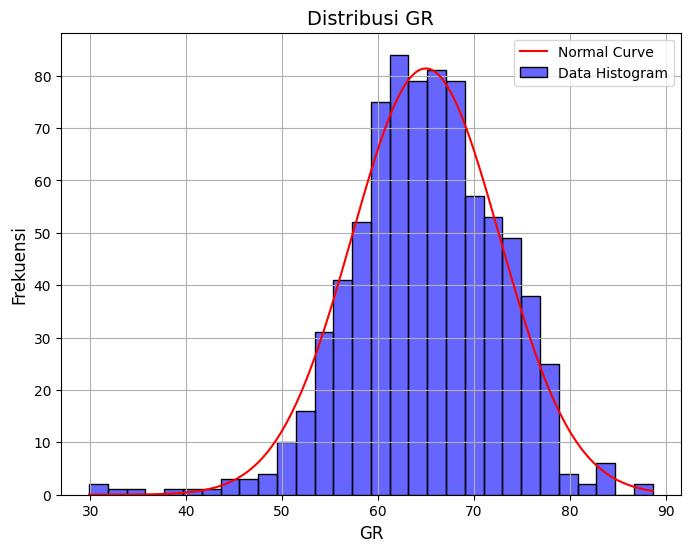

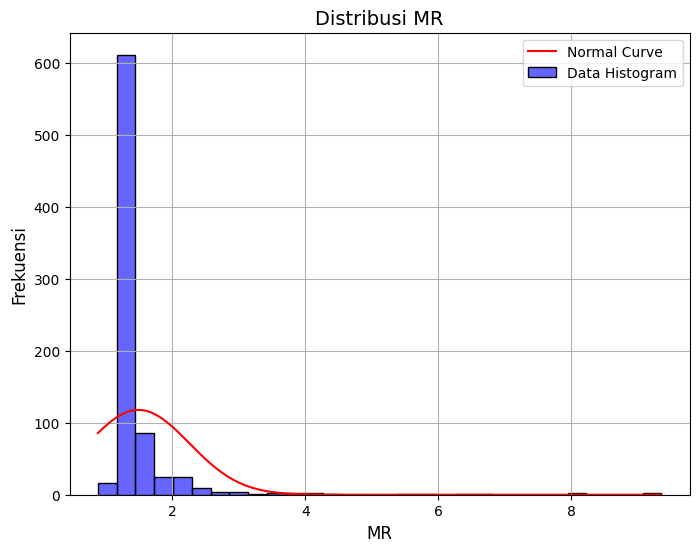

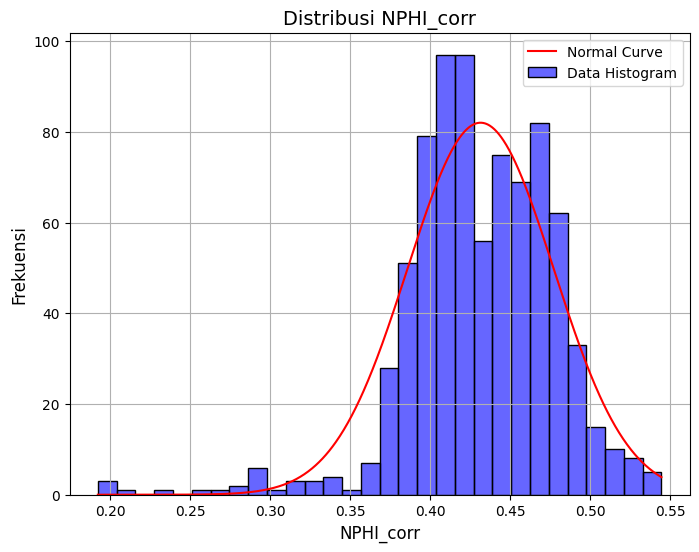

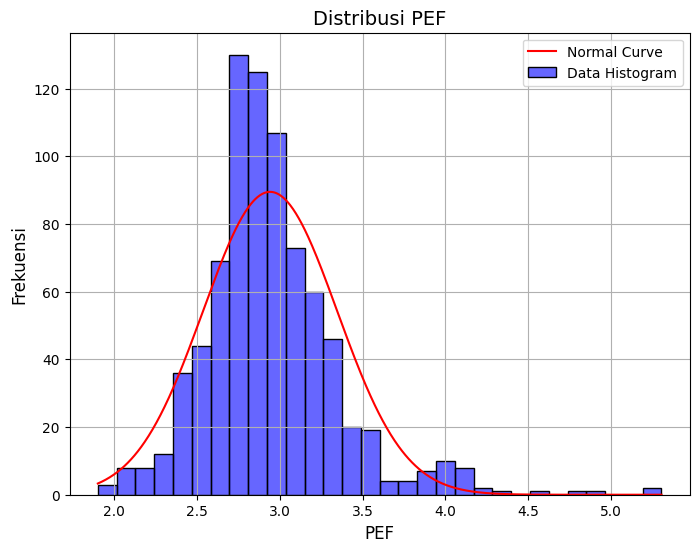

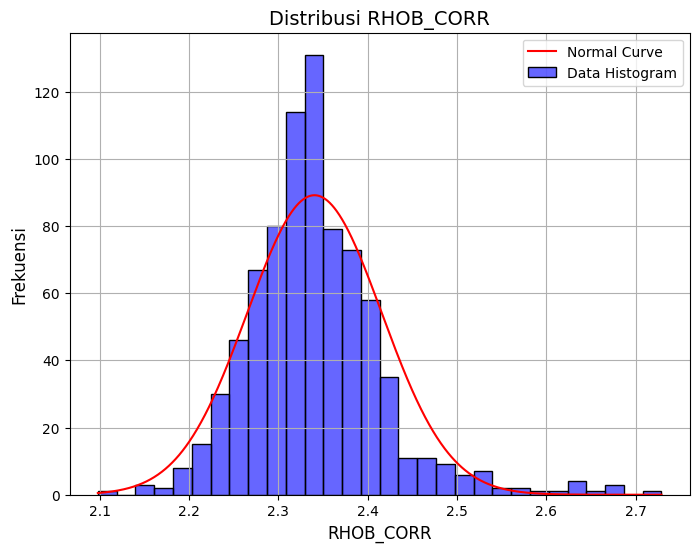

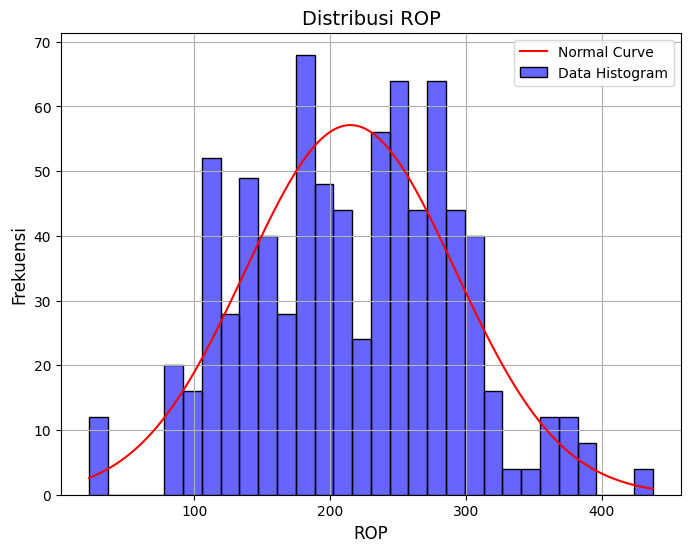

In [13]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))

    # Plot histogram
    sns.histplot(data[column], kde=False, bins=30, color='blue', alpha=0.6, label='Data Histogram')

    # Tambahkan kurva normal
    mean, std = data[column].mean(), data[column].std()
    x = np.linspace(data[column].min(), data[column].max(), 1000)
    y = norm.pdf(x, loc=mean, scale=std)
    plt.plot(x, y * len(data[column]) * (data[column].max() - data[column].min()) / 30, color='red', label='Normal Curve')

    # Label dan judul
    plt.title(f'Distribusi {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
shapiro_results = df.apply(lambda col: shapiro(col)[1])  # [0] adalah p-value
shapiro_results

,0
CALI,1.627848e-13
DRHO,2.858668e-21
GR,8.736448e-08
MR,6.023484e-47
NPHI_corr,4.794962e-17
PEF,8.595929e-20
RHOB_CORR,8.988056e-18
ROP,1.196160e-05


Berdasarkan histogram diatas, tidak ada kolom yang persebarannya mendekati normal curve dan P-value yang didapatkan sangatlah kecil (semuanya hampir mendekati nol), oleh karena itu DT, GR, PHIN, RESD, dan RHOB tidaklah berdistibusi normal

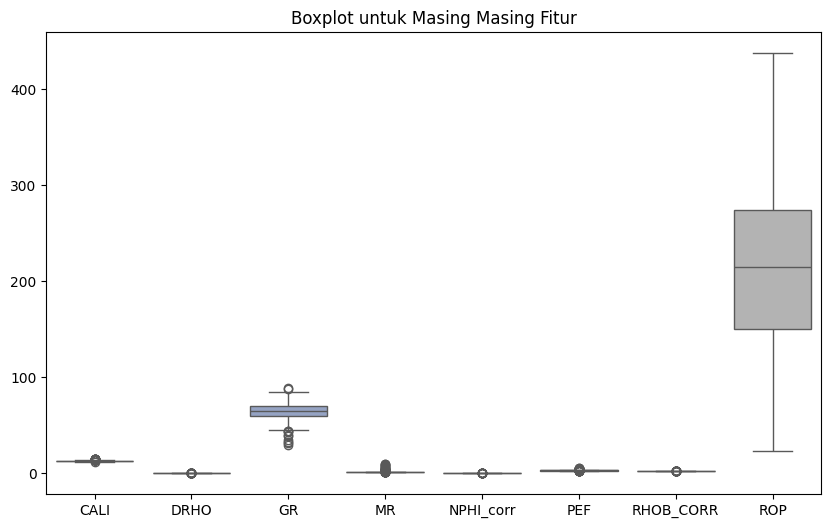

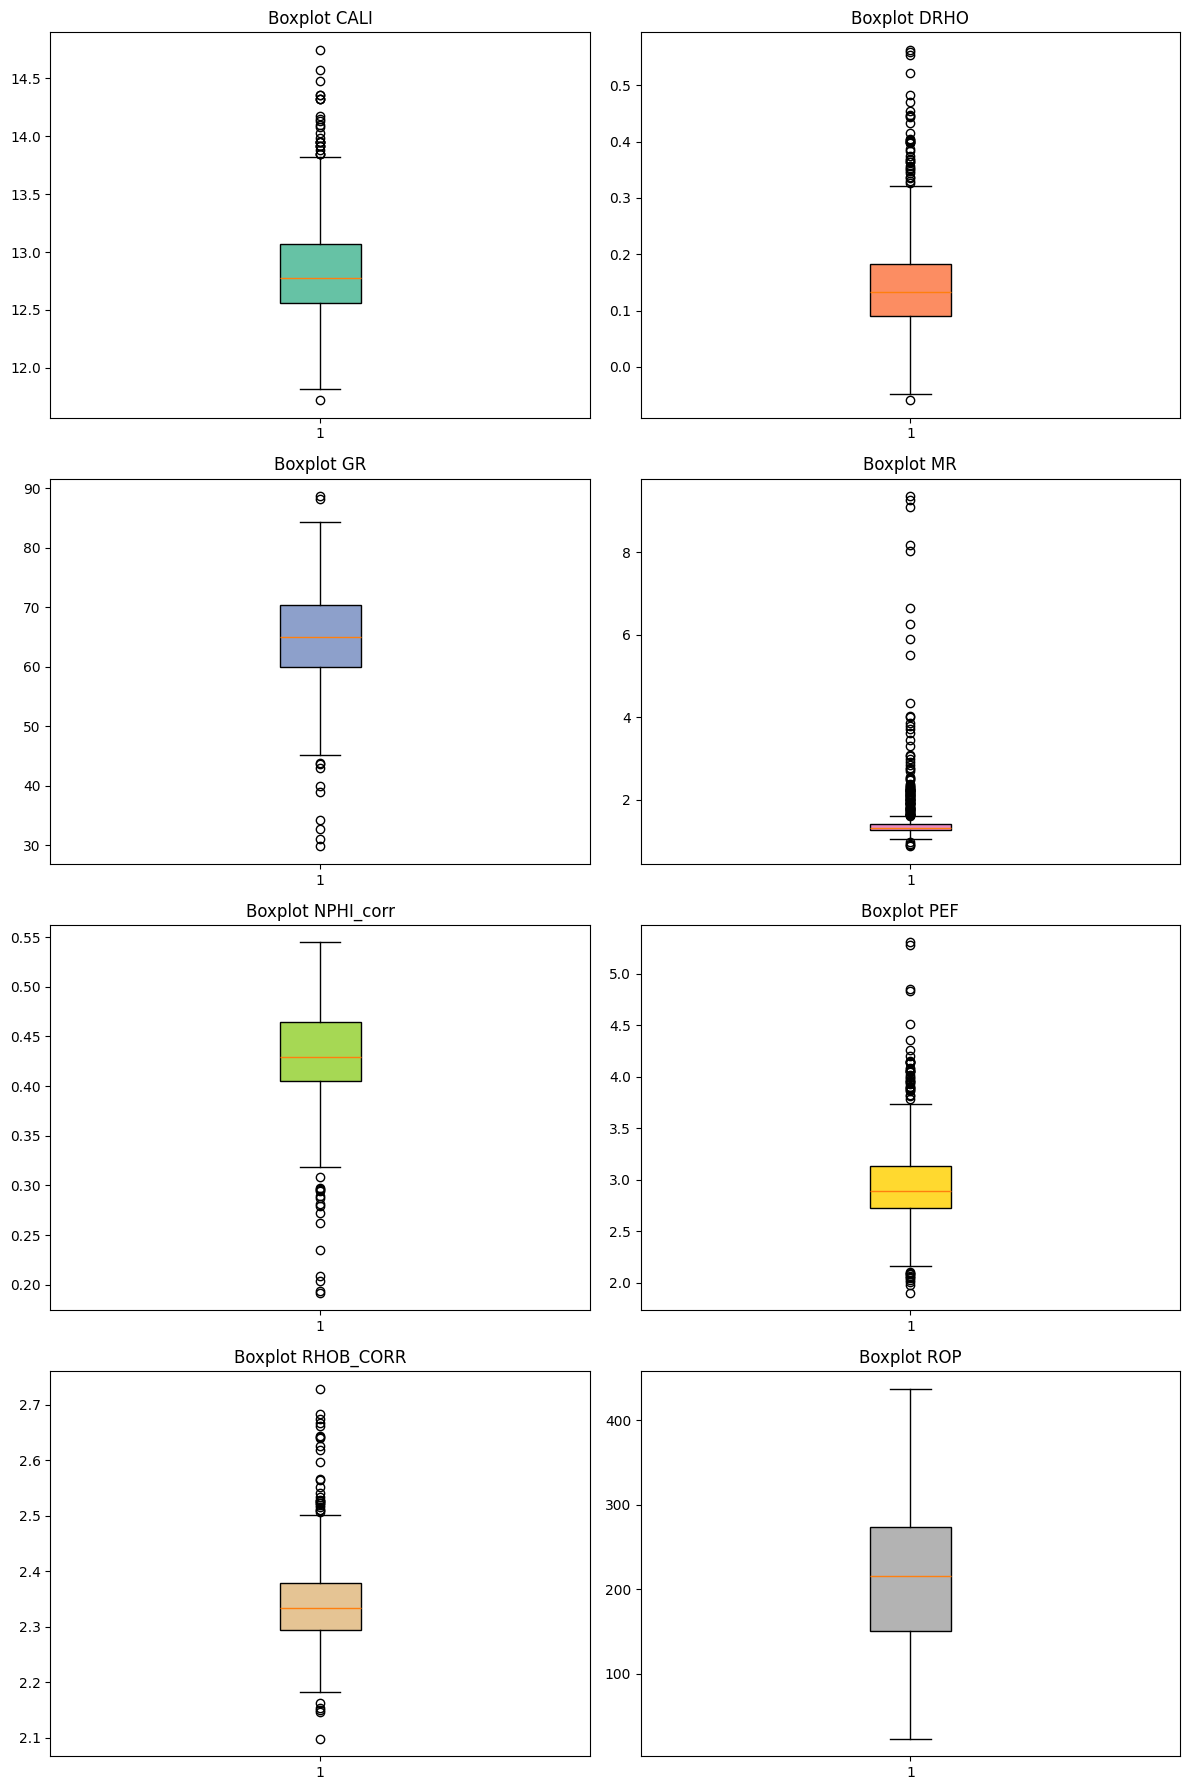

In [15]:
#Visualisasi Data


boxplot_palette = sns.color_palette("Set2", len(df.columns))


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette=boxplot_palette)
plt.title('Boxplot untuk Masing Masing Fitur')
plt.show()


fig, axes = plt.subplots(4, 2, figsize=(12, 18))
axes = axes.flatten()

for i, (column, color) in enumerate(zip(df.columns, boxplot_palette)):
    axes[i].boxplot(df[column], patch_artist=True, boxprops=dict(facecolor=color))
    axes[i].set_title(f'Boxplot {column}')

plt.tight_layout()
plt.show()

pada kolom GR, PHIN dan RESD terdapat oulier. ditunjukkan dari data yang berdada diluar interquartile range

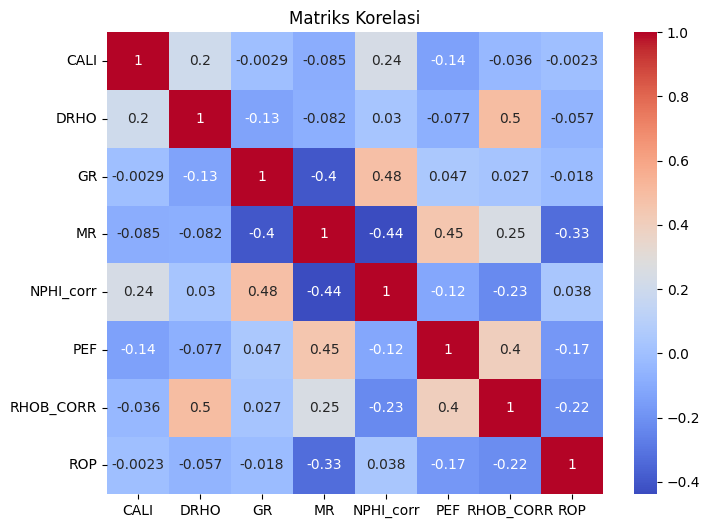

In [16]:
#Korelasi
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

* Tidak terdapat korelasi diatas 50% antar fitur, sehingga tidak perlu dilakukan reduksi dimensi (setidaknya) untuk well tersebut.
* Absensi dari korelasi antar fitur juga dapat menandakan bahwa fitur-fitur yang dipilih memiliki keunikan pattern tersendiri yang terlepas dari satu sama lain, sehingga berpotensi meningkatkan performa machine learning.

In [17]:
# Misalkan 'data' adalah DataFrame Anda dan 'df' adalah fitur yang telah Anda ekstrak
X = df  # Fitur
y = data['hydrocarbon_formation_class']  # Label

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



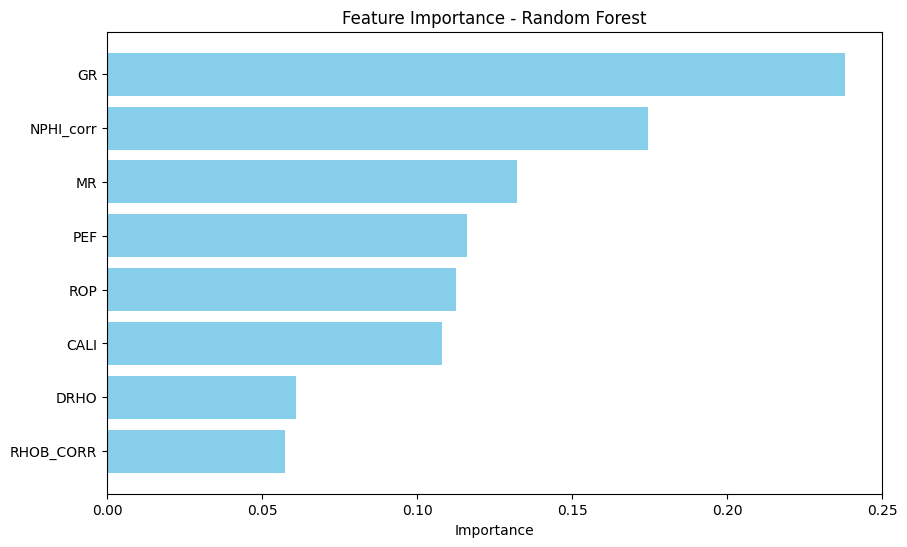

In [18]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Lihat feature importance
rf_importances = rf_model.feature_importances_
feature_names = df.columns

# Buat DataFrame untuk feature importance
rf_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=False)

# Visualisasi Feature Importance - Random Forest
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Membalikkan urutan agar fitur dengan importance terbesar di atas
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.show()


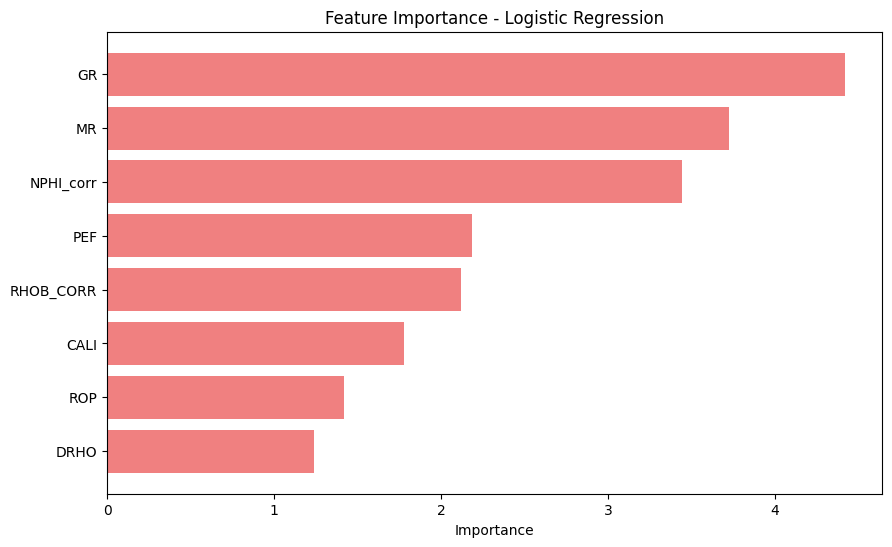

In [19]:
# Inisialisasi dan terapkan StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range = (0, 1))
X_scaled = scaler.fit_transform(X)

# Split ulang data yang sudah di-scale
# Stratified split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,
                                                                  test_size=0.3,
                                                                  stratify=y,
                                                                  random_state=42)

# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Latih model
lr_model.fit(X_train_scaled, y_train)

# Feature importance dari Logistic Regression (nilai absolut dari koefisien)
lr_importances = abs(lr_model.coef_[0])

# Buat DataFrame untuk feature importance
lr_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': lr_importances})
lr_feature_importance = lr_feature_importance.sort_values('Importance', ascending=False)

# Visualisasi Feature Importance - Logistic Regression
plt.figure(figsize=(10, 6))
plt.barh(lr_feature_importance['Feature'], lr_feature_importance['Importance'], color='lightcoral')
plt.gca().invert_yaxis()  # Membalikkan urutan agar fitur dengan importance terbesar di atas
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Importance')
plt.show()

berdasarkan hasil temuan, ranking feature importance yang didapatkan oleh random forest berbeda dengan logistic regression, hal ini disebabkan oleh 'perbedaan pendakatan model, karena logistic regression menggunakan pendakatan linear sedangkan random forest menggunakan pendekatan non linear'. korelasi linear dan feature importance digunakan untuk menyeleksi kolom yang akan digunakan dalam melatih model yang akan digunakan diakhir notebook ini.

#Data Preparation

##Splitting

In [20]:
# Misalkan 'data' adalah DataFrame Anda dan 'df' adalah fitur yang telah diekstrak
X = df  # Fitur
y = data['hydrocarbon_formation_class']  # Label

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##Feature Transformation

berdasarkan temuan yang didapat pada bagian EDA. semua kolom tidak berdistribusi normal, oleh karena itu kolom kolom ini perlu ditransformasi sedemikian sehingga kolom kolom ini mendekati distribusi normal.

In [21]:
def histogram_norm(dataframe,judul=''):
  for column in dataframe.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))

    # Plot histogram
    sns.histplot(dataframe[column], kde=False, bins=30, color='blue', alpha=0.6, label='Data Histogram')

    # Tambahkan kurva normal
    mean, std = dataframe[column].mean(), dataframe[column].std()
    x = np.linspace(dataframe[column].min(), dataframe[column].max(), 1000)
    y = norm.pdf(x, loc=mean, scale=std)
    plt.plot(x, y * len(dataframe[column]) * (dataframe[column].max() - dataframe[column].min()) / 30, color='red', label='Normal Curve')

    # Label dan judul
    plt.title(f'Distribusi {column} {judul}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

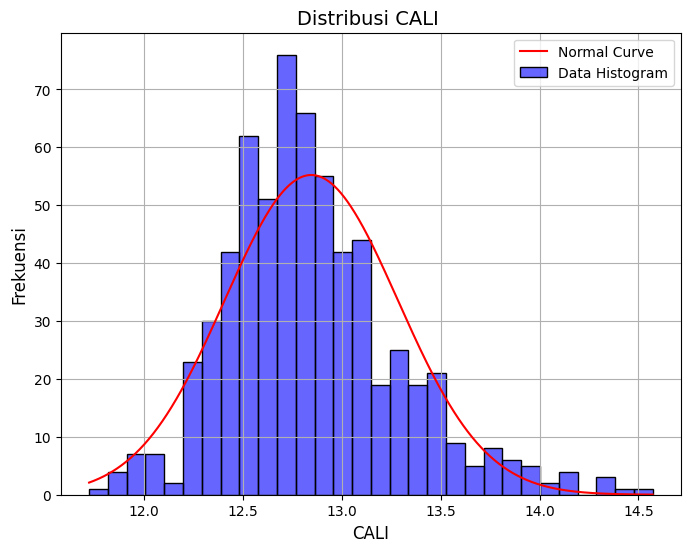

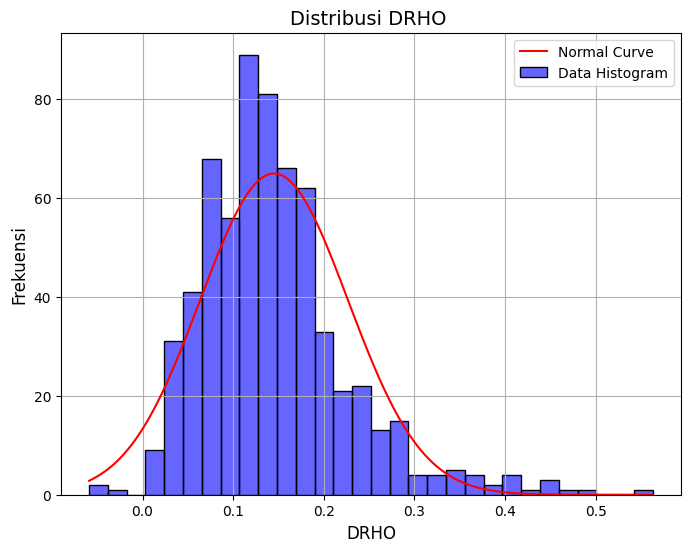

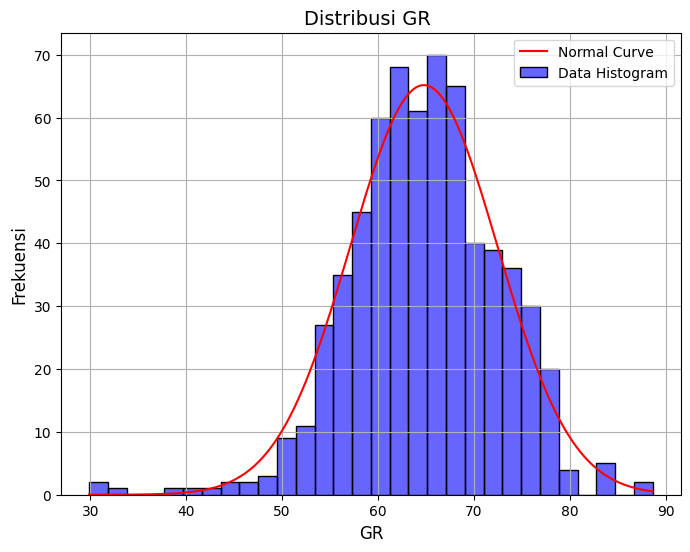

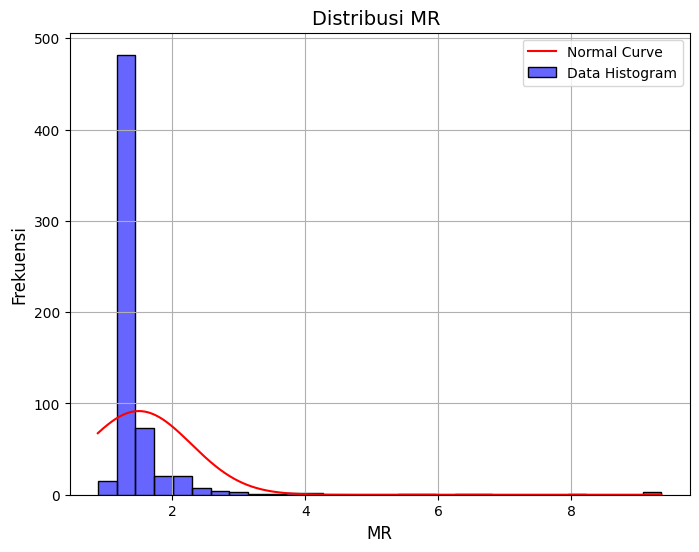

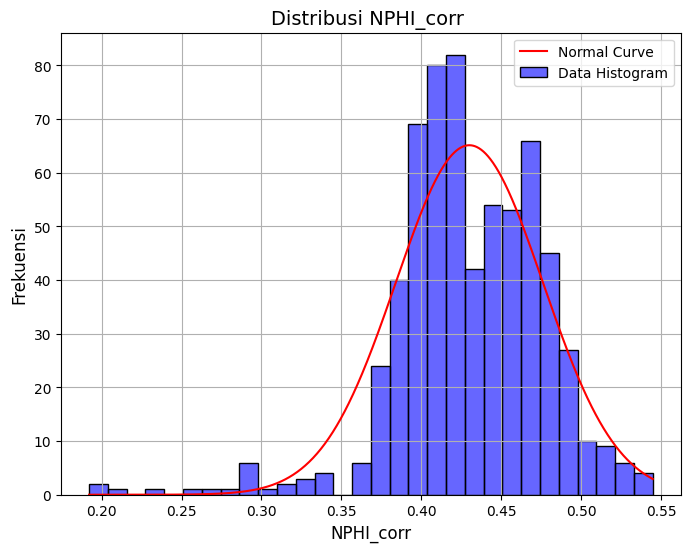

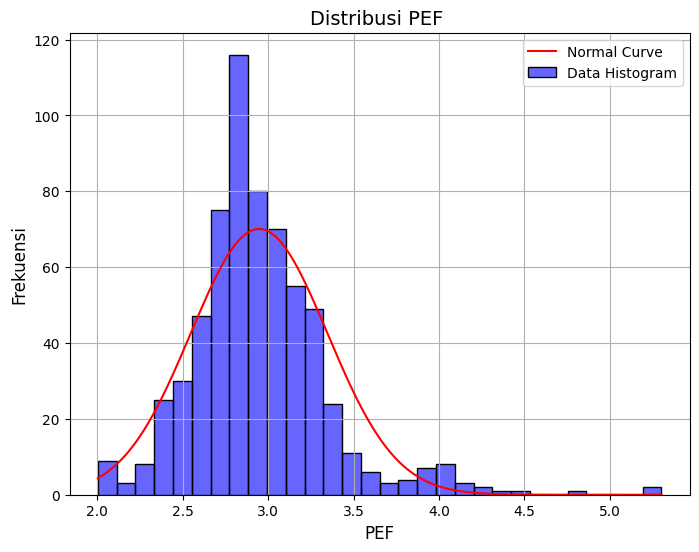

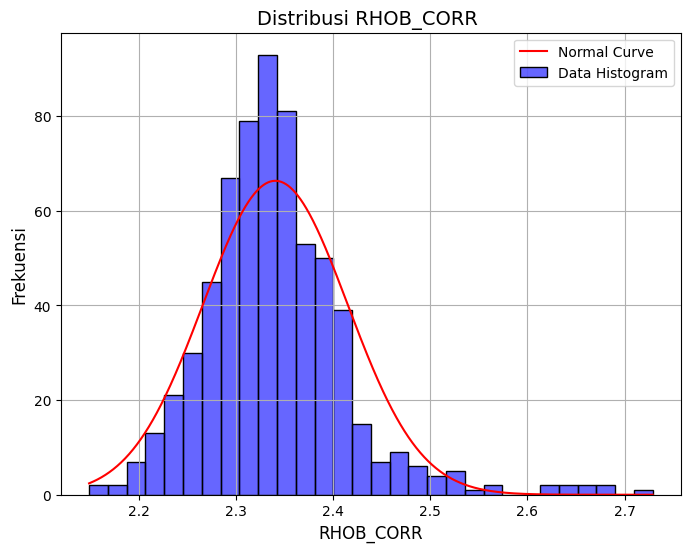

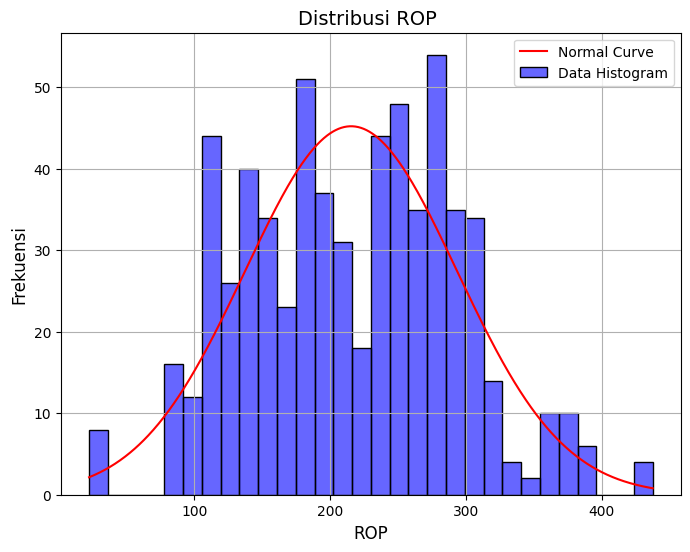

In [22]:
histogram_norm(X_train,judul='')

In [23]:
X_train.describe()

,CALI,DRHO,GR,MR,NPHI_corr,PEF,RHOB_CORR,ROP
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,12.846042,0.145117,64.793952,1.497077,0.430028,2.947128,2.340634,215.547194
std,0.439068,0.081481,7.679104,0.787070,0.046061,0.400859,0.074396,78.099711
min,11.723000,-0.059000,29.868000,0.880000,0.192200,2.003000,2.149000,22.653000
25%,12.563000,0.089000,59.811500,1.264000,0.403500,2.725000,2.296000,149.857000
50%,12.777000,0.133000,64.936500,1.314000,0.425950,2.889000,2.334000,215.314500
75%,13.073000,0.181250,69.760500,1.418500,0.463625,3.130750,2.377000,276.452000
max,14.572000,0.563000,88.665000,9.355000,0.544700,5.303000,2.729000,437.634000


###Box-Cox Tranformation

In [24]:
from scipy.special import boxcox1p

tmp_X_bc=X_train.copy()

lam = 0.3
for column in tmp_X_bc.columns:
  tmp_X_bc[column]=boxcox1p(tmp_X_bc[column],lam)

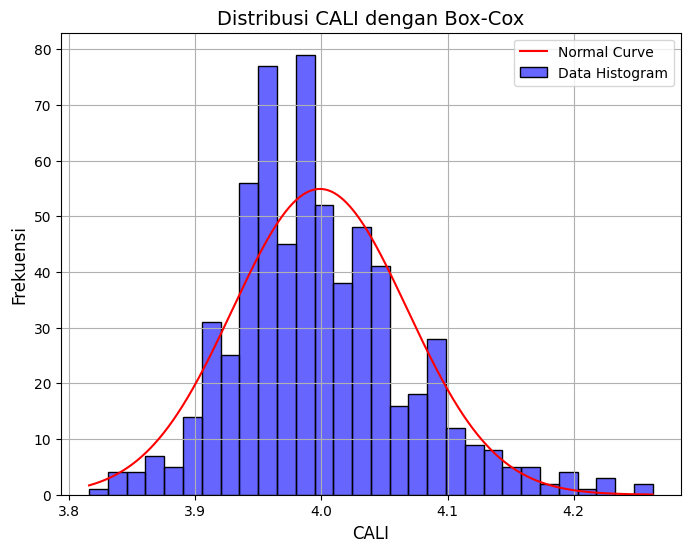

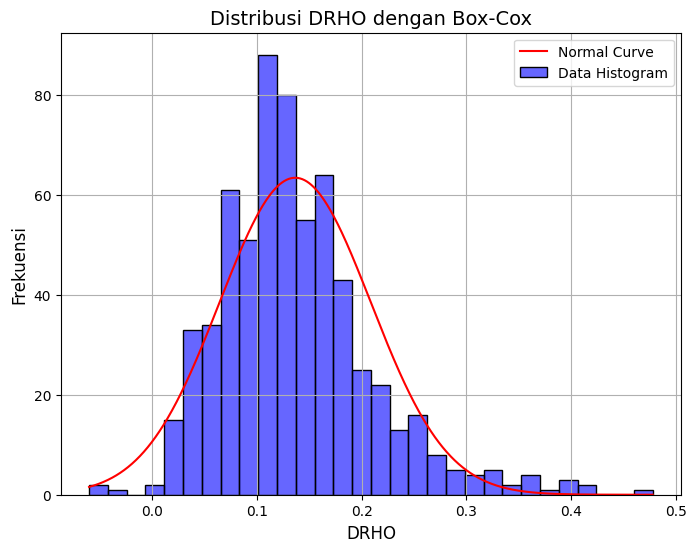

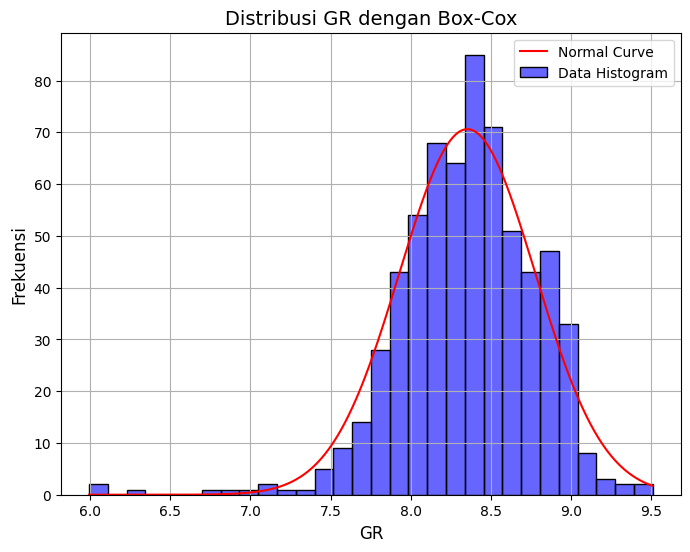

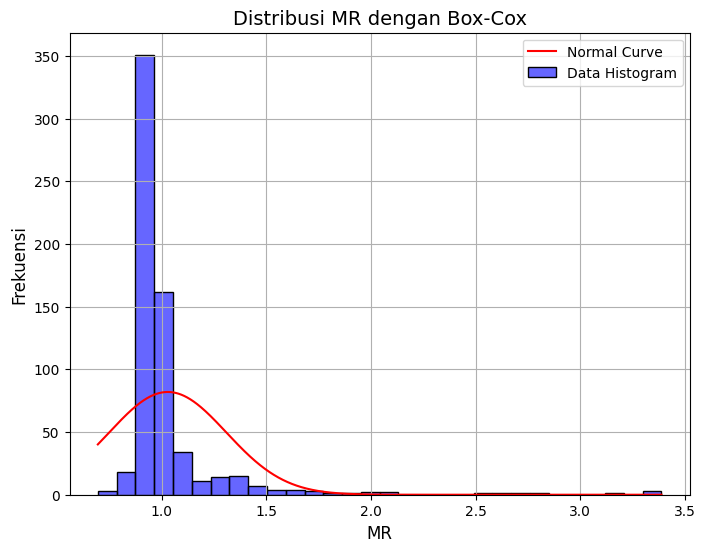

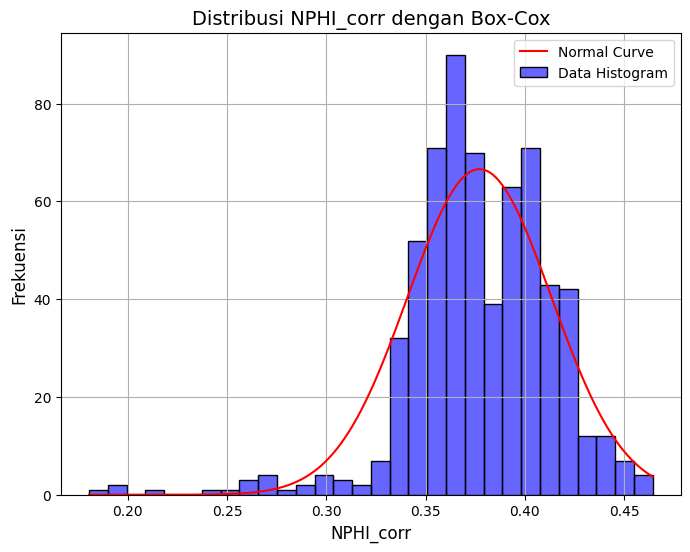

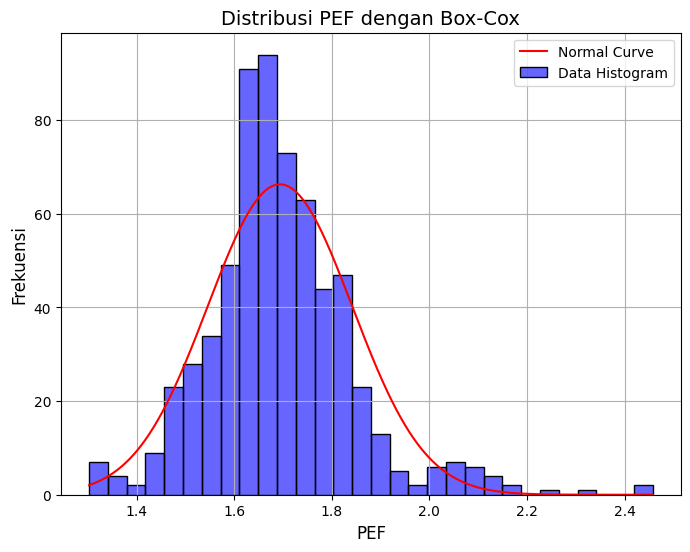

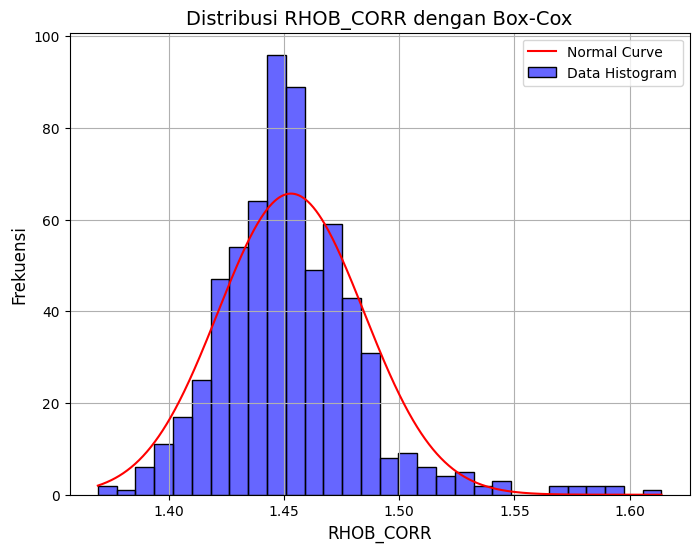

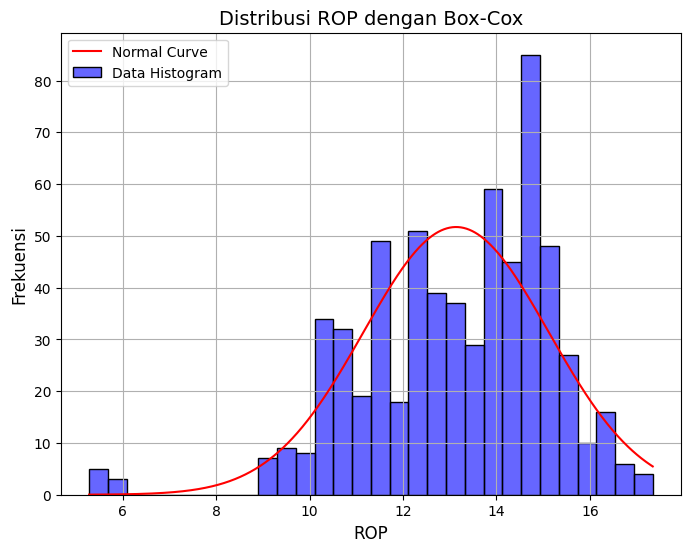

In [25]:
histogram_norm(tmp_X_bc,judul='dengan Box-Cox')

In [26]:
tmp_X_bc.apply(lambda col: shapiro(col)[1])

,0
CALI,2.380838e-09
DRHO,2.192563e-14
GR,1.132077e-12
MR,3.493482e-40
NPHI_corr,4.124330e-16
PEF,3.753611e-14
RHOB_CORR,3.151564e-16
ROP,1.551623e-12


###Yeo-Johnson

In [27]:
from sklearn.preprocessing import PowerTransformer

tmp_X_yj = X_train.copy()

yj_transformer = PowerTransformer(method='yeo-johnson',standardize=False)
yeo_johnson_data = pd.DataFrame(yj_transformer.fit_transform(tmp_X_yj))
yeo_johnson_data.columns = tmp_X_yj.columns.values
yeo_johnson_data.index = tmp_X_yj.index.values
df_tf_temp = yeo_johnson_data
for i in df_tf_temp.columns:
 tmp_X_yj[i]=df_tf_temp[i]

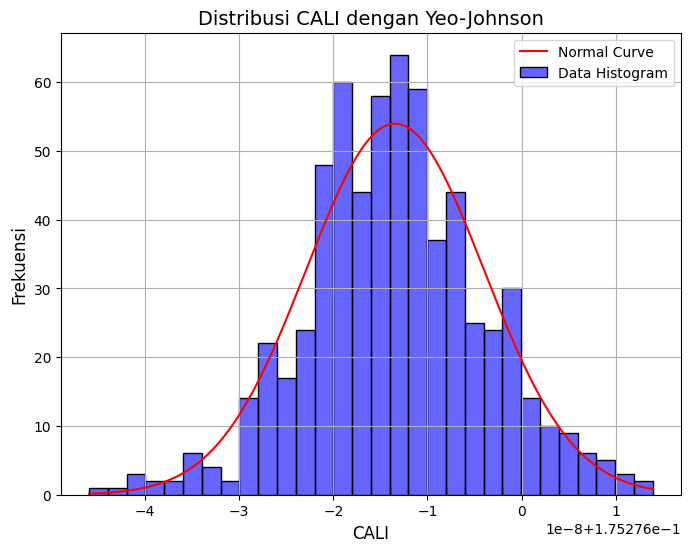

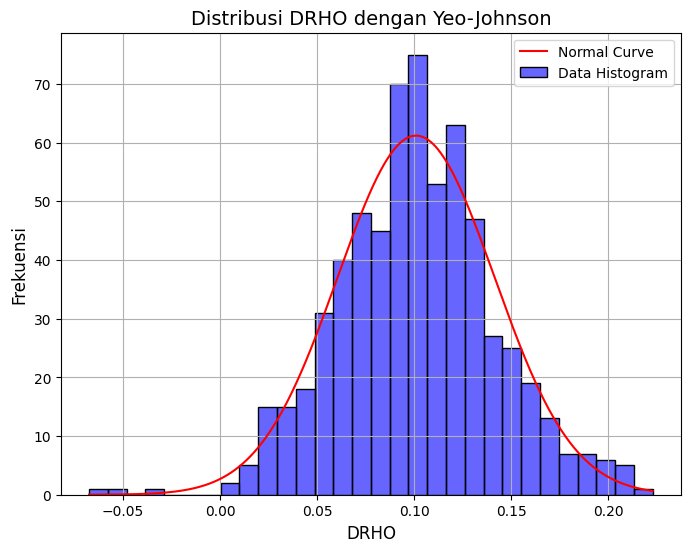

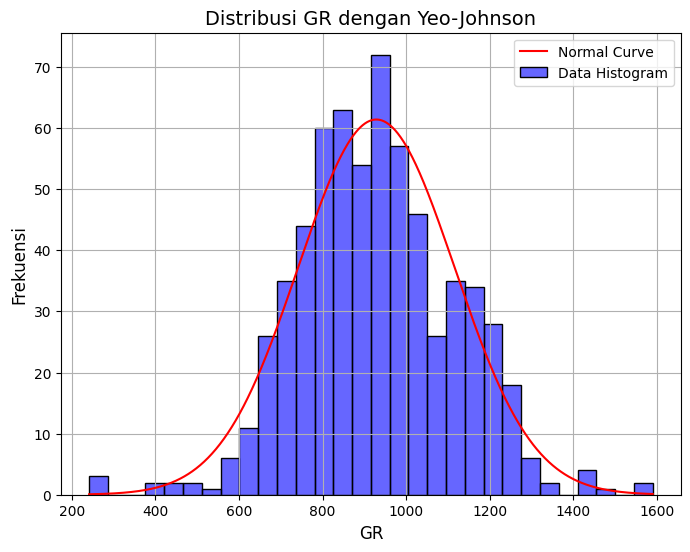

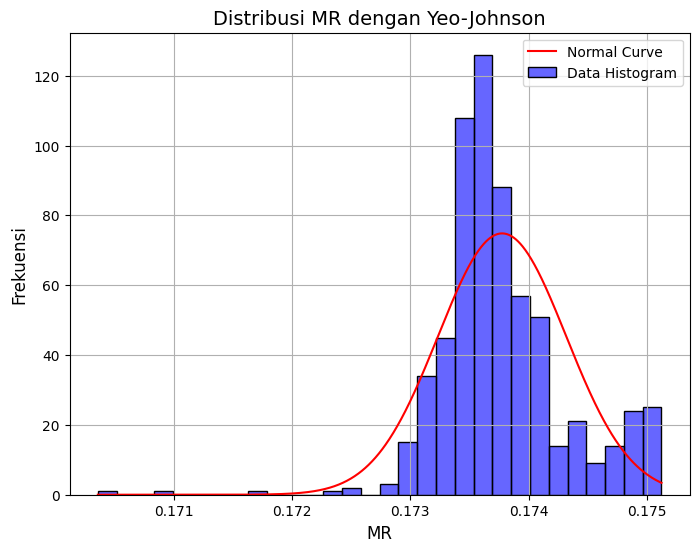

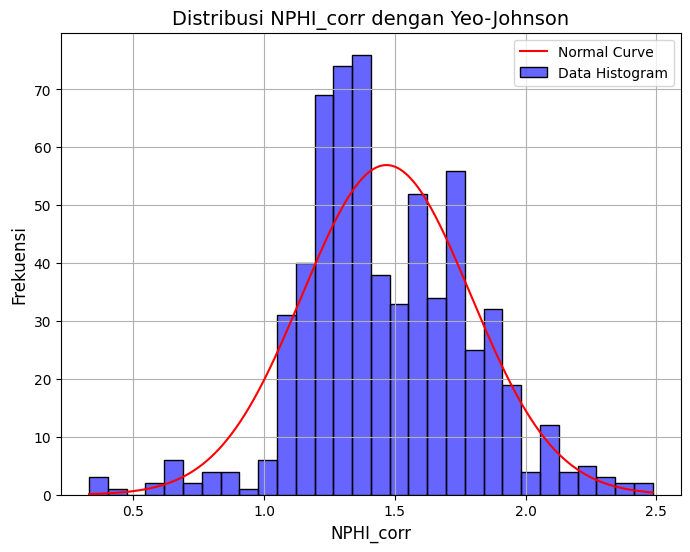

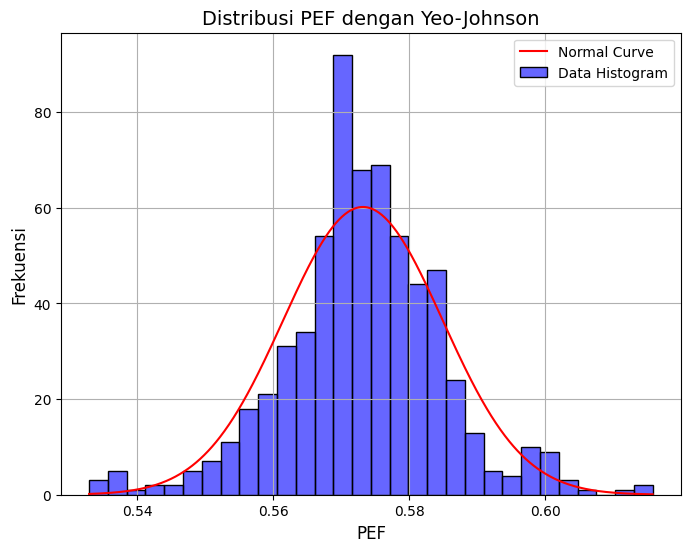

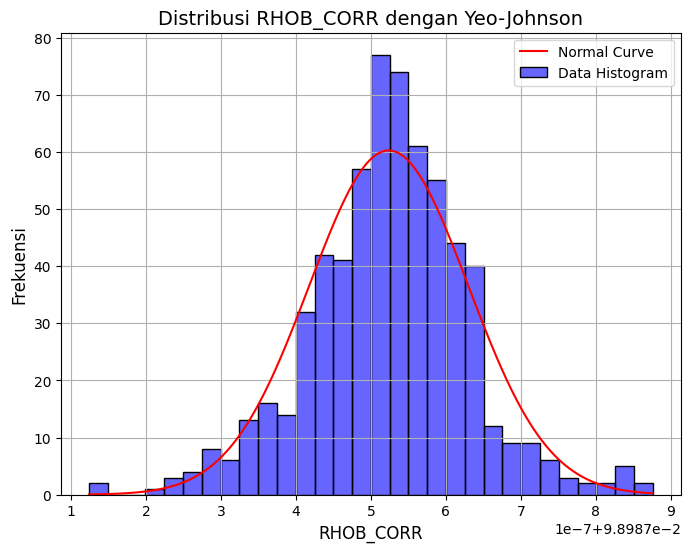

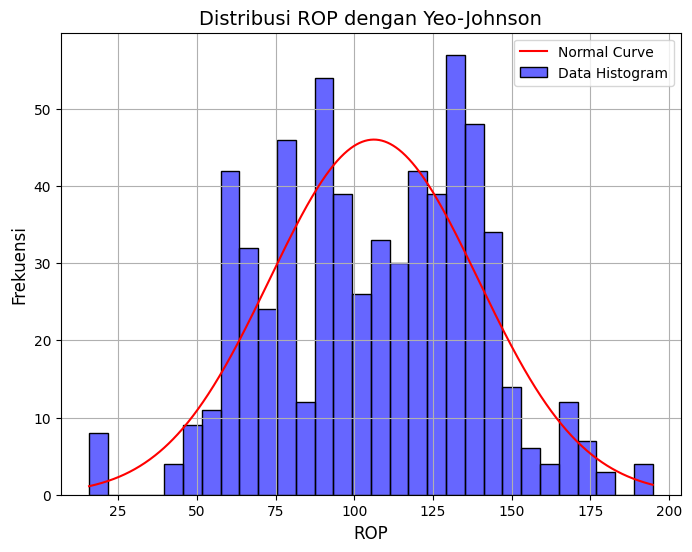

In [28]:
histogram_norm(tmp_X_yj,judul='dengan Yeo-Johnson')

In [29]:
tmp_X_yj.apply(lambda col: shapiro(col)[1])

,0
CALI,1.608751e-02
DRHO,4.815424e-03
GR,7.575384e-04
MR,1.537462e-19
NPHI_corr,2.178357e-07
PEF,9.714151e-08
RHOB_CORR,9.110915e-06
ROP,1.539387e-05


###Quantile Transformation

In [30]:
from sklearn.preprocessing import QuantileTransformer

tmp_X_qt = X_train.copy()

qt_transformer = QuantileTransformer(output_distribution='normal')
qt_data = pd.DataFrame(qt_transformer.fit_transform(tmp_X_qt))
qt_data.columns = tmp_X_qt.columns.values
qt_data.index = tmp_X_qt.index.values
df_tf_temp = qt_data
for i in df_tf_temp.columns:
 tmp_X_qt[i]=df_tf_temp[i]

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (640). n_quantiles is set to n_samples.
  warnings.warn(


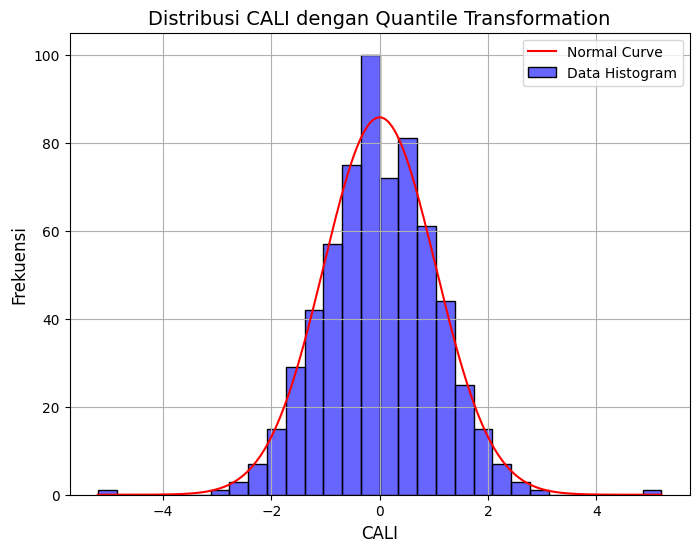

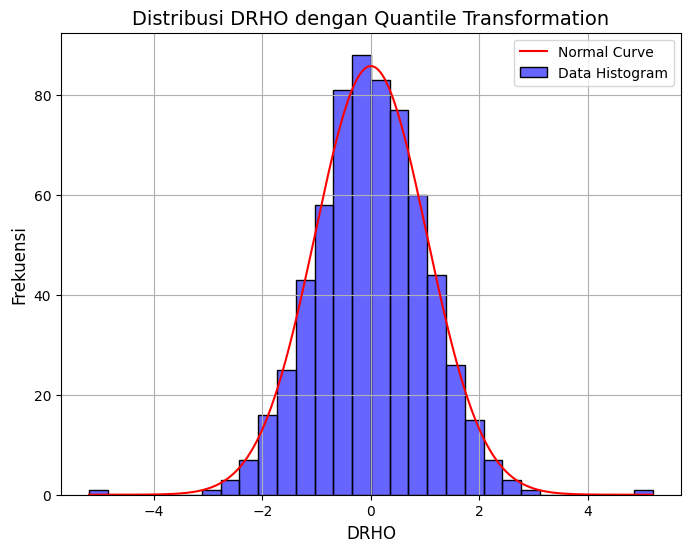

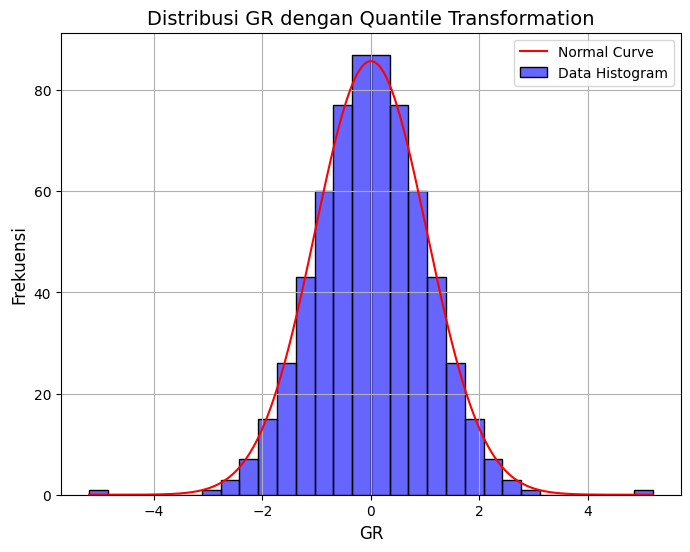

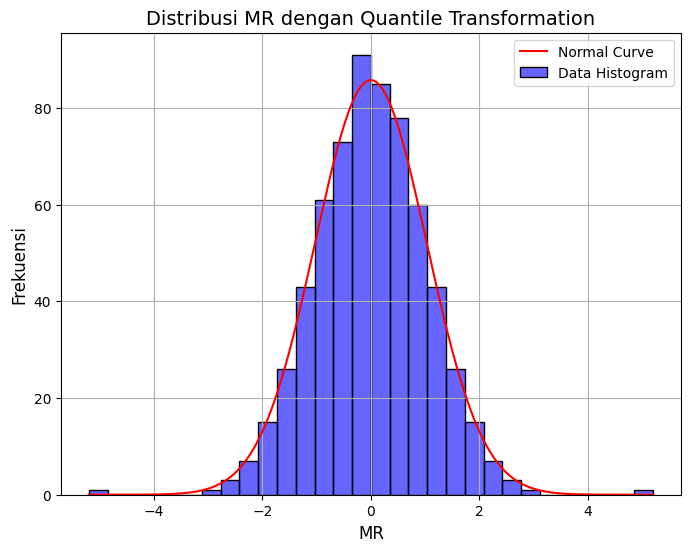

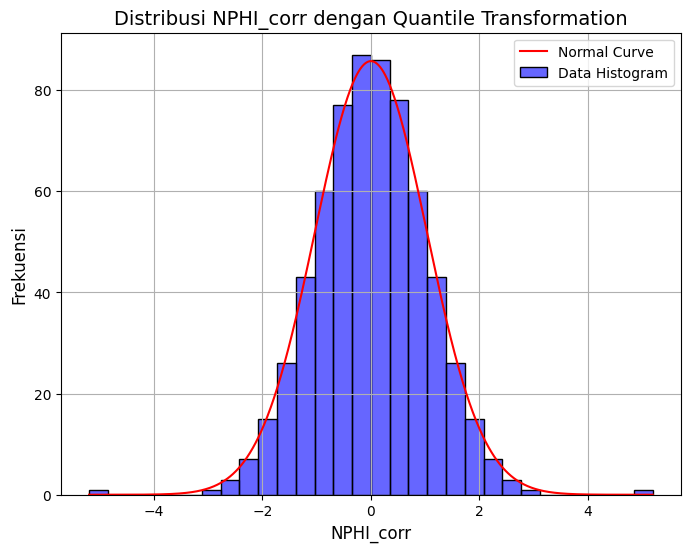

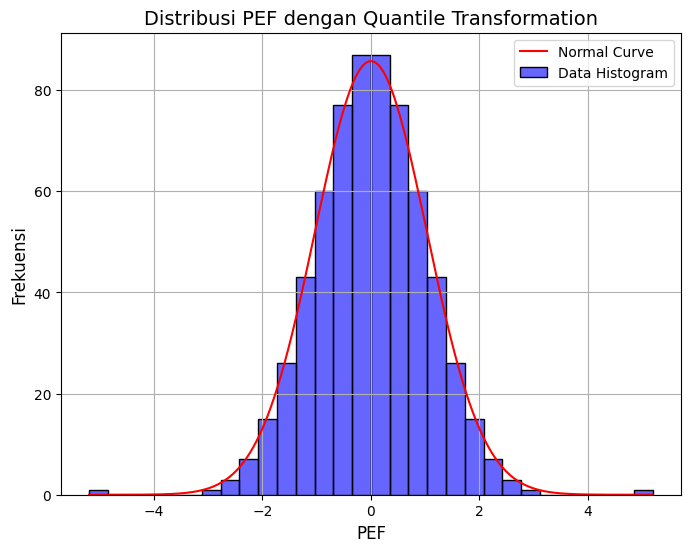

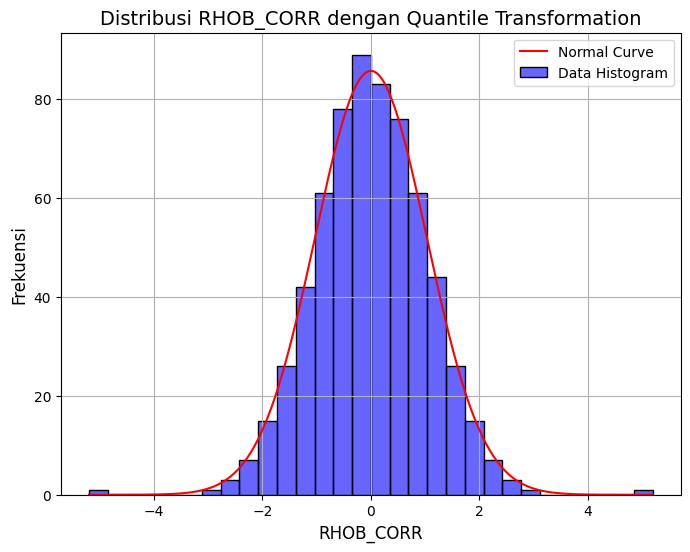

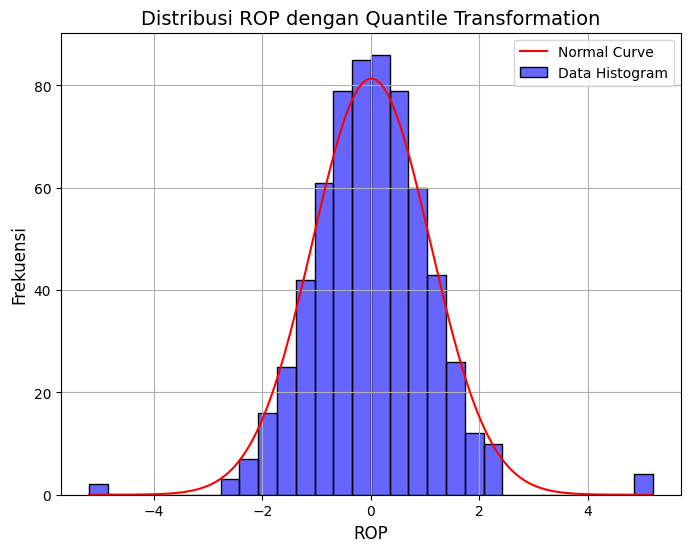

In [31]:
histogram_norm(tmp_X_qt,judul='dengan Quantile Transformation')

In [32]:
tmp_X_qt.apply(lambda col: shapiro(col)[1])

,0
CALI,2.077371e-04
DRHO,2.684841e-04
GR,2.803542e-04
MR,2.750412e-04
NPHI_corr,2.791401e-04
PEF,2.786500e-04
RHOB_CORR,2.708868e-04
ROP,6.699471e-12


###Selection

In [33]:
from scipy.stats import skew

trans_result=pd.DataFrame({'Kolom':df.columns})
tmp_bc=[]
tmp_yj=[]
tmp_qt=[]
for i in df.columns:
  tmp_bc.append(skew(tmp_X_bc[i]))
  tmp_yj.append(skew(tmp_X_yj[i]))
  tmp_qt.append(skew(tmp_X_qt[i]))

trans_result['Skewness setelah transformasi Box Cox']=tmp_bc
trans_result['Skewness setelah transformasi Yeo Johnson']=tmp_yj
trans_result['Skewness setelah transformasi Quantile']=tmp_qt
trans_result

,Kolom,Skewness setelah transformasi Box Cox,Skewness setelah transformasi Yeo Johnson,Skewness setelah transformasi Quantile
0,CALI,0.649312,-0.017600,7.099692e-04
1,DRHO,1.023486,-0.038113,1.334599e-04
2,GR,-0.889235,0.054165,-5.134286e-07
3,MR,5.285782,0.061434,5.429526e-05
4,NPHI_corr,-1.065172,0.062682,4.420289e-06
5,PEF,0.918460,-0.068305,8.124301e-05
6,RHOB_CORR,1.157493,-0.078621,1.918964e-04
7,ROP,-0.739879,-0.050388,2.751872e-01


In [34]:
from scipy.stats import kurtosis

trans_result_kurtosis=pd.DataFrame({'Kolom':df.columns})
tmp_bc=[]
tmp_yj=[]
tmp_qt=[]
for i in df.columns:
  tmp_bc.append(kurtosis(tmp_X_bc[i]))
  tmp_yj.append(kurtosis(tmp_X_yj[i]))
  tmp_qt.append(kurtosis(tmp_X_qt[i]))

trans_result_kurtosis['Kurtosis setelah transformasi Box Cox']=tmp_bc
trans_result_kurtosis['Kurtosis setelah transformasi Yeo Johnson']=tmp_yj
trans_result_kurtosis['Kurtosis setelah transformasi Quantile']=tmp_qt
trans_result_kurtosis

,Kolom,Kurtosis setelah transformasi Box Cox,Kurtosis setelah transformasi Yeo Johnson,Kurtosis setelah transformasi Quantile
0,CALI,0.879541,0.379918,1.459448
1,DRHO,2.050664,0.659608,1.456206
2,GR,3.399663,0.587572,1.457226
3,MR,34.345547,3.998949,1.457501
4,NPHI_corr,4.003436,0.704129,1.457372
5,PEF,3.097512,1.397720,1.457562
6,RHOB_CORR,3.742750,1.075206,1.457275
7,ROP,1.046531,-0.404279,3.576050


Quantile Transformation dipilih karena memberikan skewness yang lebih dekat ke nol dan memberikan kurtosis yang lebih dekat ke tiga.

In [35]:
X_train=tmp_X_qt

X_test2 = pd.DataFrame(qt_transformer.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [36]:
X_scaled2 = pd.DataFrame(qt_transformer.transform(X))
X_scaled2.columns = X.columns.values
X_scaled2.index = X.index.values
X_scaled = X_scaled2

In [37]:
X_train

,CALI,DRHO,GR,MR,NPHI_corr,PEF,RHOB_CORR,ROP
290,1.520738,2.240799,-0.033349,-0.209426,1.742751,0.605870,2.240799,-0.989581
706,0.369104,0.369104,-0.235563,1.228945,-0.417851,0.125859,-0.090346,-1.884718
154,-0.580147,-1.080038,0.171476,0.458877,-0.276098,-0.253752,-1.204278,1.716492
157,-0.725870,0.529809,0.207421,-0.388068,0.114006,-0.300634,-0.276098,-0.119930
265,-1.048931,0.219461,0.970558,0.179443,-0.383842,0.487395,-0.225492,-0.066736
...,...,...,...,...,...,...,...,...
458,-0.646436,0.000000,-0.851726,-0.478579,-1.336048,-0.398664,-0.610590,-0.350272
789,1.002465,1.317135,-0.688095,1.204278,0.615323,0.346104,0.573199,-0.703084
135,-2.733854,-2.046690,0.139710,0.897735,-0.135750,0.193413,-1.651720,0.388068
355,0.587124,0.263893,0.764710,0.589456,0.730984,0.237580,0.627218,0.191415


##Feature Scaling

karena menggunakan Quatile transformation dengan output gaussian, masing masing kolom secara otomatis ditransformasi ke distribusi normal baku, atau distribusi normal dengan rataan nol dan standar deviasi 1, oleh karena itu tidak diperlukan tambahan scaling.

In [38]:
X_train.describe()

,CALI,DRHO,GR,MR,NPHI_corr,PEF,RHOB_CORR,ROP
count,640.000000,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000
mean,0.000013,-0.000350,-5.768701e-08,-0.000004,-0.000009,-0.000045,0.000032,0.007614
std,1.031936,1.032425,1.032295e+00,1.032267,1.032284,1.032270,1.032316,1.088146
min,-5.199338,-5.199338,-5.199338e+00,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.646436,-0.675721,-6.744913e-01,-0.678188,-0.675721,-0.678188,-0.670801,-0.674504
50%,-0.003923,0.000000,0.000000e+00,-0.005884,0.000000,0.000000,-0.001961,-0.000981
75%,0.658570,0.672663,6.744913e-01,0.674491,0.674491,0.674491,0.668347,0.670801
max,5.199338,5.199338,5.199338e+00,5.199338,5.199338,5.199338,5.199338,5.199338


#Classification

##Setup

In [39]:
Train_accuracy={}
Test_accuracy={}
CrossValidation_accuracy={}

In [40]:
def confussion_matrix(true,predicted,algo):

  cm = confusion_matrix(true, predicted)
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['0', '1'],
              yticklabels=['0', '1'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix '+str(algo))
  plt.show()


In [41]:
def accuracy_scoring(Model, feature_train, label_train, feature_test, label_test):
  # Melakukan prediksi pada data pelatihan
  y_train_pred = Model.predict(feature_train)

  # Menghitung akurasi pada data pelatihan
  train_accuracy = accuracy_score(label_train, y_train_pred)
  print(f"Akurasi pada data pelatihan: {train_accuracy:.2f}")

  # Melakukan prediksi pada data pengujian
  y_test_pred = Model.predict(feature_test)

  # Menghitung akurasi pada data pengujian
  test_accuracy = accuracy_score(label_test, y_test_pred)
  print(f"Akurasi pada data pengujian: {test_accuracy:.2f}")


In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def create_plot(dataframe, curves_to_plot, depth_curve, outlier, facies_curves=[]):
    """
    Creates a plot of well log data, including facies curves.

    Args:
        dataframe (pandas.DataFrame): DataFrame containing well log data.
        curves_to_plot (list): List of column names to plot.
        depth_curve (pandas.Series or numpy.ndarray): Depth values.
        outlier (bool): Whether or not to include a white color for outliers.
        facies_curves (list): List of column names representing facies curves.
    Returns:
        matplotlib.colors.ListedColormap: The colormap used for facies.
    """

    num_tracks = len(curves_to_plot)

    if outlier:
        facies_color = ['White', '#F4D03F', '#F5B041', '#DC7633', '#6E2C00', '#1B4F72', '#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red', 'black', 'blue']
    else:
        facies_color = ['#F4D03F', '#F5B041', '#DC7633', '#6E2C00', '#1B4F72', '#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red', 'black', 'blue']

    Facies_color = ['#F4D03F', '#F5B041', '#DC7633', '#6E2C00', '#1B4F72', '#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red', 'black', 'blue']

    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks * 2, 10))

    fig.suptitle("Classification Result", fontsize=20, y=1.05)

    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            if curve == 'hydrocarbon_formation_class':
                cmap_facies = colors.ListedColormap(Facies_color[0:dataframe[curve].max() + 1], 'indexed')
                cluster = np.repeat(np.expand_dims(dataframe[curve].values, 1), 100, 1)
                im = ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto', vmin=dataframe[curve].min(), vmax=dataframe[curve].max(), extent=[0, 20, depth_curve.max(), depth_curve.min()])
            else:
                cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max() + 1], 'indexed')
                cluster = np.repeat(np.expand_dims(dataframe[curve].values, 1), 100, 1)
                im = ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto', vmin=dataframe[curve].min(), vmax=dataframe[curve].max(), extent=[0, 20, depth_curve.max(), depth_curve.min()])
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')

        # We want to pass in the deepest depth first, so we are displaying the data
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
        # ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (feet)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible=False)

    plt.tight_layout()
    plt.show()

    return cmap_facies

In [43]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [44]:
def test_model(Model, feature_train=X_train, label_train=y_train):
  # Membuat objek StratifiedKFold
  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Lakukan cross-validation dengan stratified sampling
  scores = cross_val_score(Model, feature_train, label_train, cv=stratified_kfold, scoring='accuracy')
  score =[scores.mean()]
  return score[0]

In [45]:
def model_comp_plot(nama_model, model_def, model_gs, cv_def, cv_gs, feature_train=X_train, label_train=y_train, feature_test=X_test, label_test=y_test):
  Train_acc=[]
  Test_acc=[]
  CrossValidation_acc=[]

  Train_acc.append(accuracy_score(label_train, model_def.predict(feature_train)))
  Test_acc.append(accuracy_score(label_test, model_def.predict(feature_test)))
  CrossValidation_acc.append(cv_def)

  Train_acc.append(accuracy_score(label_train, model_gs.predict(feature_train)))
  Test_acc.append(accuracy_score(label_test, model_gs.predict(feature_test)))
  CrossValidation_acc.append(cv_gs)

  plt.figure(figsize=(5, 5))
  x_p = np.arange(2)
  width = 0.2
  for i in range(len(x_p)):
    # Train
    plt.text(x_p[i] - 0.2, Train_acc[i] + 0.01, f'{Train_acc[i]:.2f}', ha='center', fontsize=9)
    # Test
    plt.text(x_p[i], Test_acc[i] + 0.01, f'{Test_acc[i]:.2f}', ha='center', fontsize=9)
    # CrossValidation
    plt.text(x_p[i] + 0.2, CrossValidation_acc[i] + 0.01, f'{CrossValidation_acc[i]:.2f}', ha='center', fontsize=9)

  plt.bar(x_p-0.2, Train_acc, width, color='cyan')
  plt.bar(x_p, Test_acc, width, color='orange')
  plt.bar(x_p+0.2, CrossValidation_acc, width, color='green')
  plt.xticks(x_p, ['Default Hyperparameter', 'GridsearchCV Hyperparameter'])
  plt.ylabel("Accuracy")
  plt.legend(["Train", "Test", "Average CrossValidation"],loc="lower center")
  plt.grid(axis = 'y')
  plt.title(nama_model)

  plt.axhline(y=CrossValidation_acc[0], color='red', linestyle='--', linewidth=1.5, label=f'Baseline: {CrossValidation_acc[0]:.2f}')

  plt.show()

##Logistic Regression

In [46]:
# Membuat model Logistic Regression
lr_model = LogisticRegression(random_state=42)

print("Cross-Validation Score:", test_model(lr_model))

Cross-Validation Score: 0.828125


In [47]:
# Melatih model dengan data pelatihan
lr_model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred_lr = lr_model.predict(X_test)

In [48]:
# Menghitung classification report
lr_report = classification_report(y_test, y_pred_lr)

print("\nClassification Report:")
print(lr_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        71
           1       0.84      0.90      0.87        90

    accuracy                           0.85       161
   macro avg       0.85      0.84      0.85       161
weighted avg       0.85      0.85      0.85       161



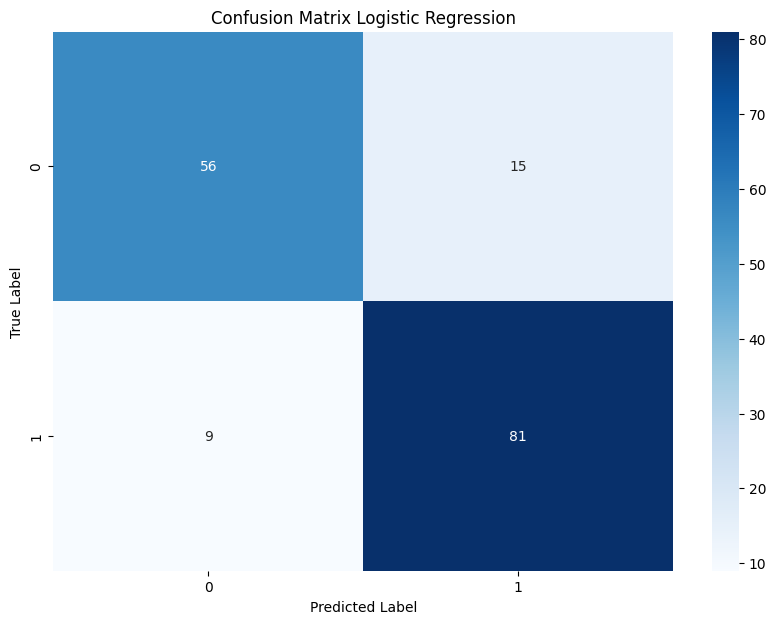

In [49]:
confussion_matrix(y_test,y_pred_lr,'Logistic Regression')

In [50]:
accuracy_scoring(lr_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 0.83
Akurasi pada data pengujian: 0.85


In [51]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Nilai regularisasi
    'solver': ['lbfgs', 'saga'],  # Algoritma solver yang stabil untuk multiclass
    'max_iter': [1000, 2000, 3000]  # Menambah jumlah iterasi untuk meningkatkan peluang konvergensi
}
# Inisialisasi GridSearchCV
lr_model_cv = LogisticRegression(random_state=42)
grid_search = GridSearchCV(lr_model_cv, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)

# Melatih model menggunakan GridSearchCV
start_sk = time.time()
grid_search.fit(X_train, y_train)
end_sk = time.time()

sk_duration = end_sk - start_sk
print(f"sklearn GridSearchCV training time: {sk_duration:.2f} seconds")

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

best_lr_model = grid_search.best_estimator_

print("Best Logistic Regression Model:", best_lr_model)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
sklearn GridSearchCV training time: 7.23 seconds
Best Hyperparameters: {'C': 1, 'max_iter': 1000, 'solver': 'lbfgs'}
Best Logistic Regression Model: LogisticRegression(C=1, max_iter=1000, random_state=42)
Best Cross-Validation Score: 0.828125


In [52]:
y_pred_best_lr = best_lr_model.predict(X_test)
# Menghitung classification report
best_lr_report = classification_report(y_test, y_pred_best_lr)

print("\nClassification Report:")
print(best_lr_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        71
           1       0.84      0.90      0.87        90

    accuracy                           0.85       161
   macro avg       0.85      0.84      0.85       161
weighted avg       0.85      0.85      0.85       161



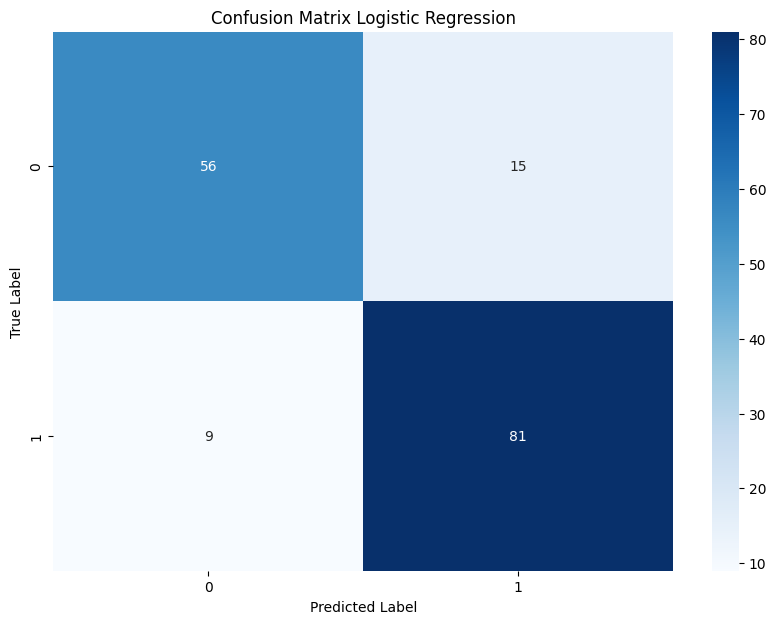

In [53]:
confussion_matrix(y_test,y_pred_best_lr,'Logistic Regression')

In [54]:
accuracy_scoring(best_lr_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 0.83
Akurasi pada data pengujian: 0.85


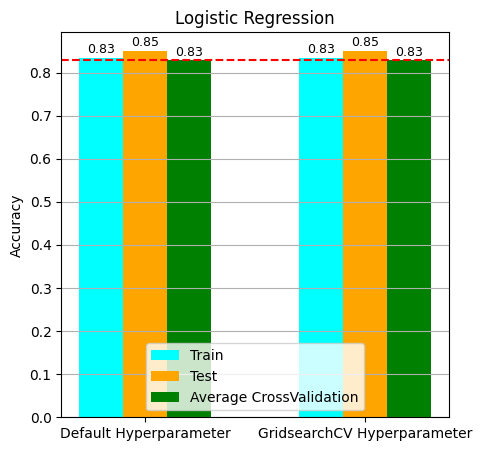

In [55]:
model_comp_plot("Logistic Regression", lr_model, best_lr_model, test_model(lr_model), grid_search.best_score_)

Model yang dilatih menggunakan hyparameter optimal memberikan Crossvalidation accuracy yang lebih besar dibandingkan model yang menggunakan hyperparameter default sehingga model yang terbaru dipilih

In [56]:
Train_accuracy['LR']=accuracy_score(y_train, best_lr_model.predict(X_train))
Test_accuracy['LR']=accuracy_score(y_test, best_lr_model.predict(X_test))
CrossValidation_accuracy['LR']= grid_search.best_score_

In [57]:
data['LR'] = best_lr_model.predict(X_scaled)

##KNN


In [58]:
# Membuat model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors menentukan jumlah tetangga terdekat, default adalah 5
print("Cross-Validation Score:", test_model(knn_model))

Cross-Validation Score: 0.9296875


In [59]:
# Melatih model dengan data pelatihan
knn_model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred_knn = knn_model.predict(X_test)

In [60]:
# Menghitung classification report
report = classification_report(y_test, y_pred_knn)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        71
           1       0.91      0.94      0.93        90

    accuracy                           0.92       161
   macro avg       0.92      0.92      0.92       161
weighted avg       0.92      0.92      0.92       161



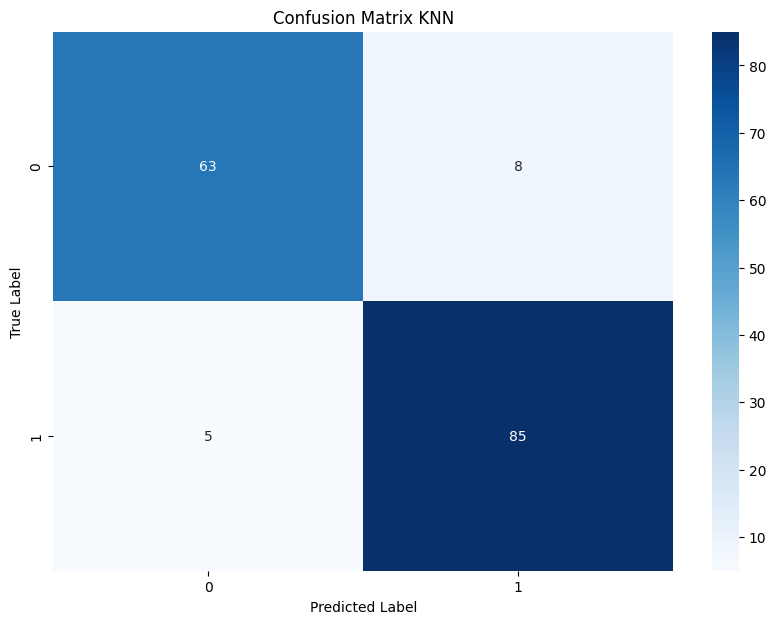

In [61]:
confussion_matrix(y_test,y_pred_knn,'KNN')

In [62]:
accuracy_scoring(knn_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 0.96
Akurasi pada data pengujian: 0.92


In [63]:
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25],  # Jumlah tetangga terdekat
    'weights': ['uniform', 'distance'],  # Pembobotan tetangga
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Metode untuk menghitung jarak
}
knn_model_cv = KNeighborsClassifier(n_neighbors=5)
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(knn_model_cv, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)

# Melatih model menggunakan GridSearchCV
start_sk = time.time()
grid_search.fit(X_train, y_train)
end_sk = time.time()

sk_duration = end_sk - start_sk
print(f"sklearn GridSearchCV training time: {sk_duration:.2f} seconds")

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
sklearn GridSearchCV training time: 1.55 seconds
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Score: 0.9515625


In [64]:
best_knn_model = grid_search.best_estimator_

y_pred_best_knn = best_knn_model.predict(X_test)
# Menghitung classification report
best_knn_report = classification_report(y_test, y_pred_best_knn)

print("\nClassification Report:")
print(best_knn_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        71
           1       0.94      0.98      0.96        90

    accuracy                           0.95       161
   macro avg       0.95      0.95      0.95       161
weighted avg       0.95      0.95      0.95       161



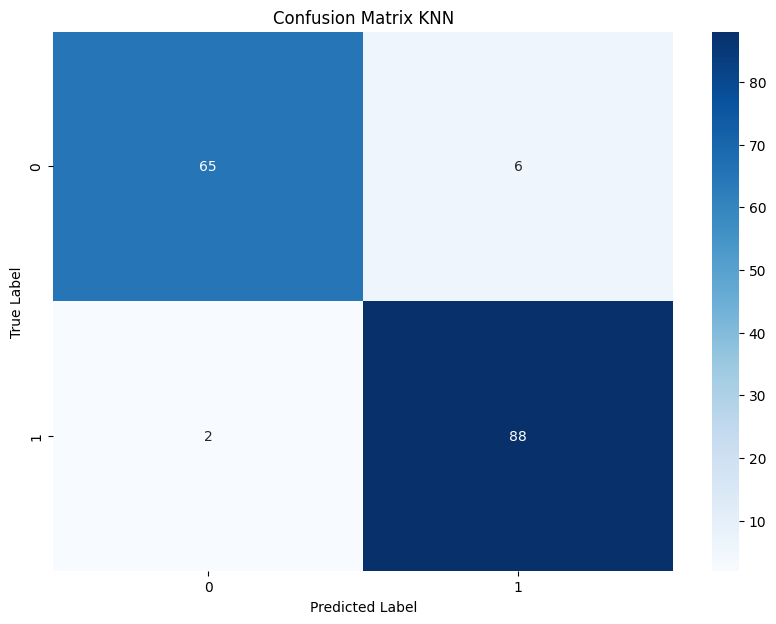

In [65]:
confussion_matrix(y_test,y_pred_best_knn,'KNN')

In [66]:
accuracy_scoring(best_knn_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 1.00
Akurasi pada data pengujian: 0.95


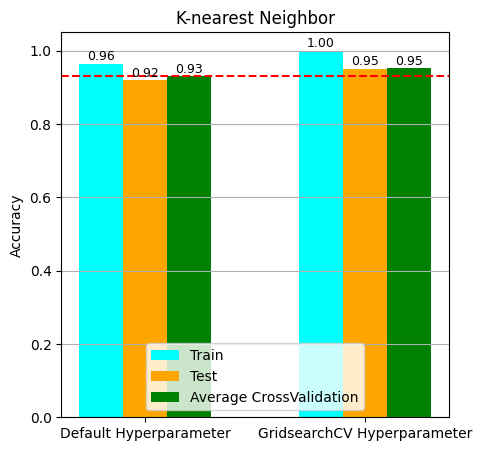

In [67]:
model_comp_plot("K-nearest Neighbor", knn_model, best_knn_model, test_model(knn_model), grid_search.best_score_)

Terjadi overfitting saat menggunakan grid search, oleh karena itu model knn pertama digunakan.

In [68]:
Train_accuracy['K-Nearest Neighbor']=accuracy_score(y_train, best_knn_model.predict(X_train))
Test_accuracy['K-Nearest Neighbor']=accuracy_score(y_test, best_knn_model.predict(X_test))
CrossValidation_accuracy['K-Nearest Neighbor']= test_model(best_knn_model)

In [69]:
data['KNN'] = best_knn_model.predict(X_scaled)

##Support Vector Machine

In [70]:
# Membuat model SVM
svm_model = SVC(kernel='linear', random_state=42)  # Menggunakan kernel linear sebagai contoh
print("Cross-Validation Score:", test_model(svm_model))

Cross-Validation Score: 0.83125


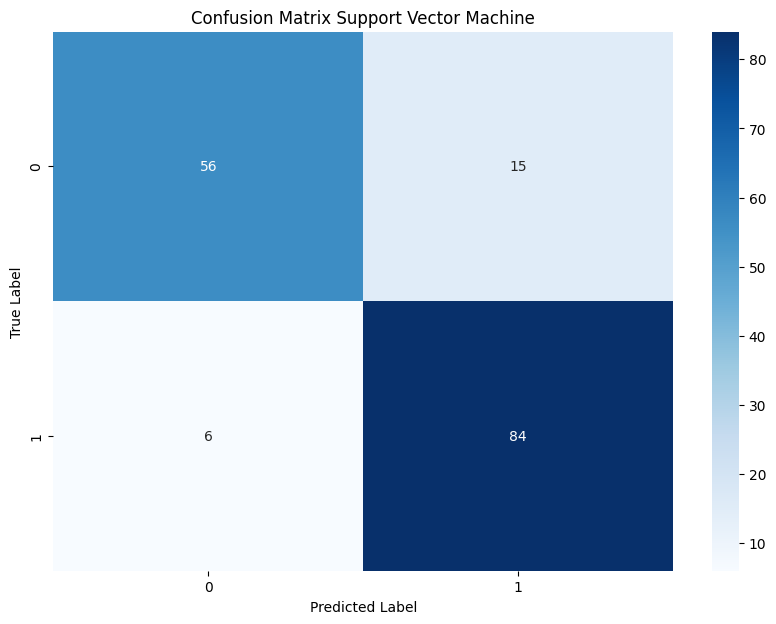

In [71]:

# Melatih model dengan data pelatihan
svm_model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred_svm = svm_model.predict(X_test)

confussion_matrix(y_test,y_pred_svm,'Support Vector Machine')

In [72]:
accuracy_scoring(svm_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 0.84
Akurasi pada data pengujian: 0.87


In [73]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Nilai regularisasi
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Jenis kernel
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  # Parameter gamma untuk kernel non-linear
}
svm_model_cv = SVC(kernel='linear', random_state=42)
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model_cv, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)

# Melatih model menggunakan GridSearchCV
start_sk = time.time()
grid_search.fit(X_train, y_train)
end_sk = time.time()

sk_duration = end_sk - start_sk
print(f"sklearn GridSearchCV training time: {sk_duration:.2f} seconds")

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menampilkan model terbaik berdasarkan hyperparameter yang ditemukan
best_svm_model = grid_search.best_estimator_
print("Best SVM Model:", best_svm_model)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
sklearn GridSearchCV training time: 15.47 seconds
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best SVM Model: SVC(C=10, gamma=0.1, random_state=42)
Best Cross-Validation Score: 0.940625


In [74]:
y_pred_best_svm = best_svm_model.predict(X_test)
# Menghitung classification report
best_svm_report = classification_report(y_test, y_pred_best_svm)

print("\nClassification Report:")
print(best_svm_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        71
           1       0.92      0.96      0.94        90

    accuracy                           0.93       161
   macro avg       0.93      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161



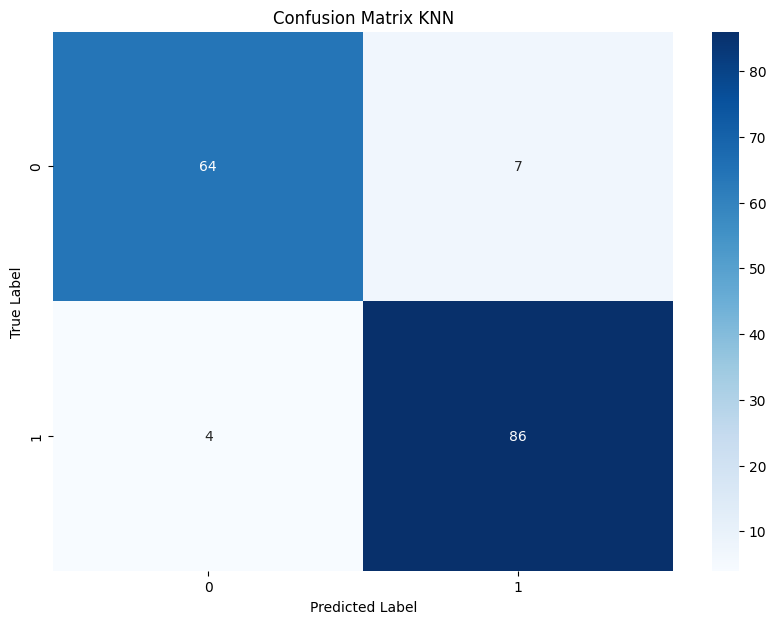

In [75]:
confussion_matrix(y_test,y_pred_best_svm,'KNN')

In [76]:
accuracy_scoring(best_svm_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 0.98
Akurasi pada data pengujian: 0.93


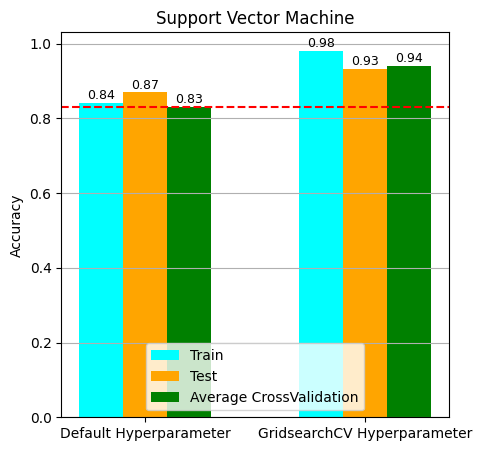

In [77]:
model_comp_plot("Support Vector Machine", svm_model, best_svm_model, test_model(svm_model), grid_search.best_score_)

Model yang dilatih menggunakan hyparameter optimal memberikan Crossvalidation accuracy yang lebih besar dibandingkan model yang menggunakan hyperparameter default sehingga model yang terbaru dipilih

In [78]:
Train_accuracy['SVM']=accuracy_score(y_train, best_svm_model.predict(X_train))
Test_accuracy['SVM']=accuracy_score(y_test, best_svm_model.predict(X_test))
CrossValidation_accuracy['SVM']= grid_search.best_score_

In [79]:
data['SVM'] = best_svm_model.predict(X_scaled)

##Decision Tree

In [80]:
# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
print("Cross-Validation Score:", test_model(dt_model))

Cross-Validation Score: 0.859375


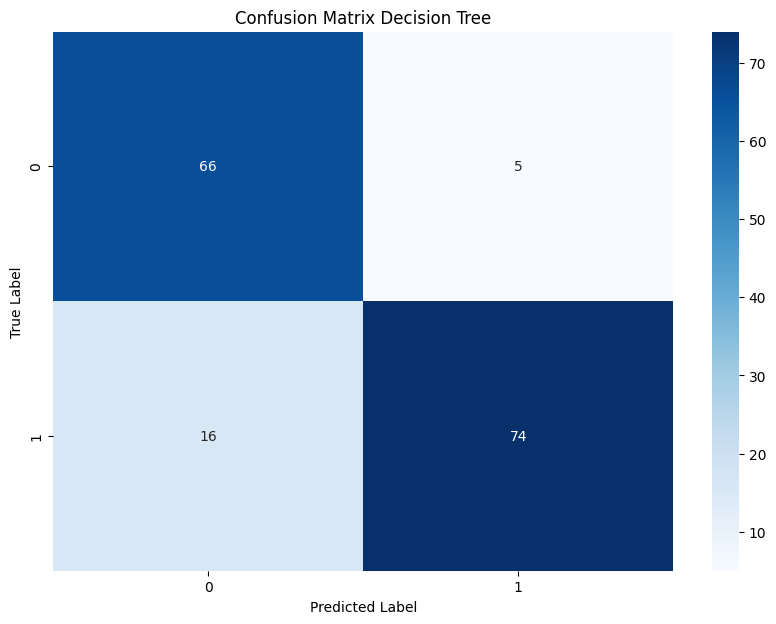

In [81]:
# Melatih model dengan data pelatihan
dt_model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred_dt = dt_model.predict(X_test)

confussion_matrix(y_test, y_pred_dt, "Decision Tree")

In [82]:
report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report Decision Tree:")
print(report_dt)

Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        71
           1       0.94      0.82      0.88        90

    accuracy                           0.87       161
   macro avg       0.87      0.88      0.87       161
weighted avg       0.88      0.87      0.87       161



In [83]:
accuracy_scoring(dt_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 1.00
Akurasi pada data pengujian: 0.87


In [84]:
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Membatasi kedalaman lebih jauh
    'min_samples_split': [10, 20, 30],  # Meningkatkan jumlah sampel minimum untuk split
    'min_samples_leaf': [5, 10, 20],  # Meningkatkan jumlah sampel minimum per leaf
    'max_leaf_nodes': [None, 10, 20, 30],  # Membatasi jumlah maksimum leaf nodes
    'max_features': ['sqrt', 'log2', None],  # Membatasi jumlah fitur yang dipertimbangkan
    'criterion': ['gini', 'entropy']  # Kriteria untuk mengukur kualitas split
}
dt_model_cv = DecisionTreeClassifier(random_state=42)
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(dt_model_cv, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)

# Melatih model menggunakan GridSearchCV
start_sk = time.time()
grid_search.fit(X_train, y_train)
end_sk = time.time()

sk_duration = end_sk - start_sk
print(f"sklearn GridSearchCV training time: {sk_duration:.2f} seconds")

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menampilkan model terbaik berdasarkan hyperparameter yang ditemukan
best_dt_model = grid_search.best_estimator_
print("Best Decision Tree Model:", best_dt_model)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
sklearn GridSearchCV training time: 29.21 seconds
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': 30, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best Decision Tree Model: DecisionTreeClassifier(max_features='log2', max_leaf_nodes=30,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)
Best Cross-Validation Score: 0.85625


In [85]:
y_pred_best_dt = best_dt_model.predict(X_test)
# Menghitung classification report
best_dt_report = classification_report(y_test, y_pred_best_dt)

print("\nClassification Report:")
print(best_dt_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        71
           1       0.85      0.82      0.84        90

    accuracy                           0.82       161
   macro avg       0.82      0.82      0.82       161
weighted avg       0.82      0.82      0.82       161



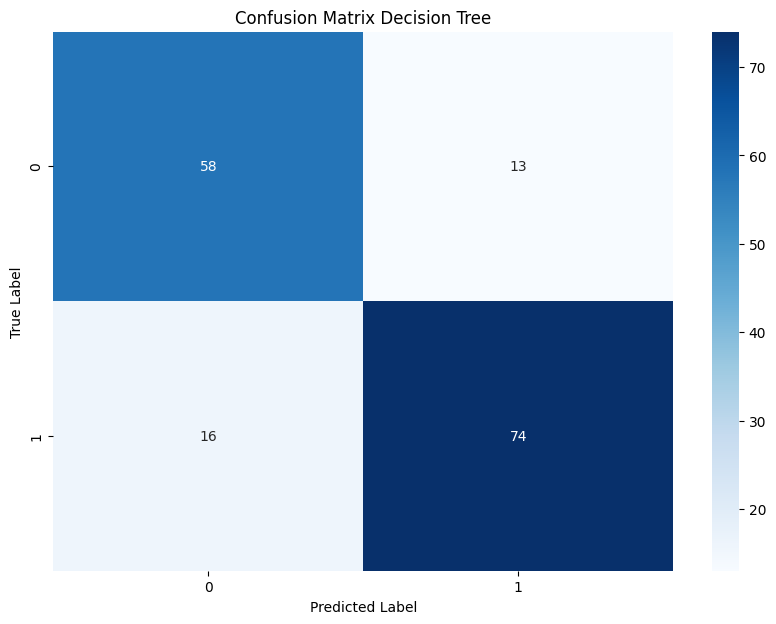

In [86]:

confussion_matrix(y_test, y_pred_best_dt, "Decision Tree")

In [87]:
accuracy_scoring(best_dt_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 0.92
Akurasi pada data pengujian: 0.82


model dengan parameter yang dipilih menggunakan gridsearch menghasilkan akurasi yang lebih rendah pada data latih dan data uji, namun perbedaan yang tidak terlalu jauh antara akurasi pada data latih dengan data uji  menunjukkan bahwa model lebih baik dalam menggeneralisasi ke data yang tidak terlihat dibandingkan dengan model decision tree awal yang terlihat overfitting.

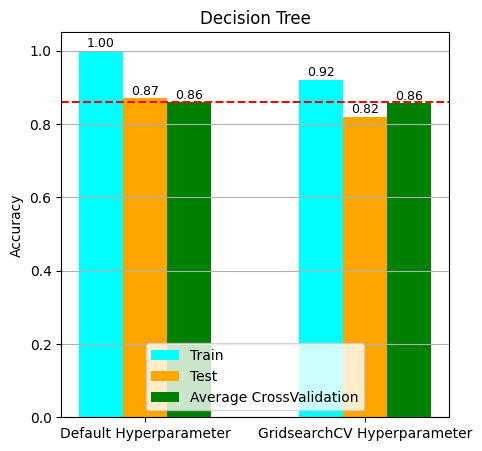

In [88]:
model_comp_plot("Decision Tree", dt_model, best_dt_model, test_model(dt_model), grid_search.best_score_)

In [89]:
Train_accuracy['DT']=accuracy_score(y_train, best_dt_model.predict(X_train))
Test_accuracy['DT']=accuracy_score(y_test, best_dt_model.predict(X_test))
CrossValidation_accuracy['DT']= cross_val_score(best_dt_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy').mean()

In [90]:
data['DeT'] = best_dt_model.predict(X_scaled)

##Random Forest

In [91]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)
print("Cross-Validation Score:", test_model(rf_model))

Cross-Validation Score: 0.9234375


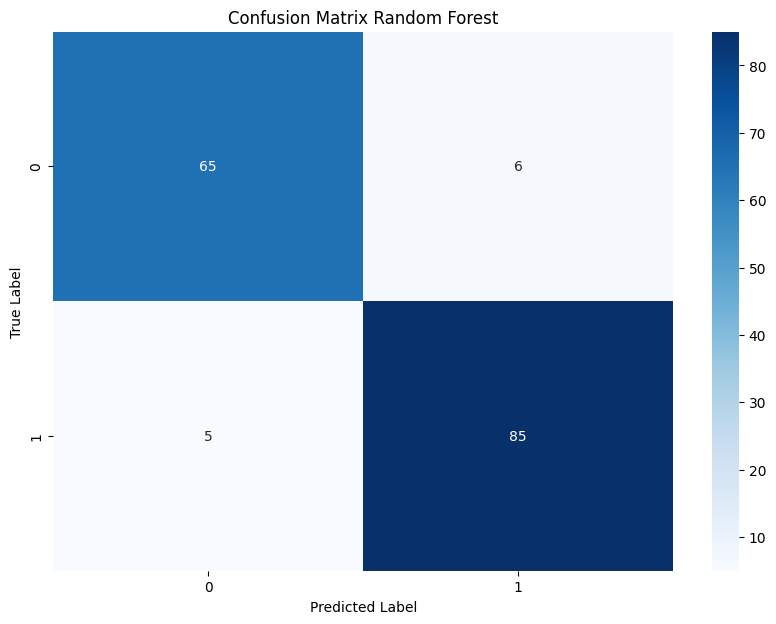

In [92]:
# Melatih model dengan data pelatihan
rf_model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred_rf = rf_model.predict(X_test)

confussion_matrix(y_test, y_pred_rf, "Random Forest")

In [93]:
# Menghitung classification report untuk Random Forest
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report Random Forest:")
print(report_rf)

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.93      0.94      0.94        90

    accuracy                           0.93       161
   macro avg       0.93      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161



In [94]:
accuracy_scoring(rf_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 1.00
Akurasi pada data pengujian: 0.93


In [95]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Mengurangi jumlah pohon
    'max_depth': [5, 10, 15],  # Membatasi kedalaman lebih jauh
    'min_samples_split': [5, 10, 20],  # Meningkatkan jumlah sampel minimum untuk split
    'min_samples_leaf': [2, 5, 10],  # Meningkatkan jumlah sampel minimum per leaf node
    'max_features': ['sqrt', 'log2'],  # Mengurangi fitur yang dipertimbangkan
    'bootstrap': [True, False]  # Menggunakan atau tidak bootstrap samples
}
rf_model_cv = RandomForestClassifier(random_state=42)
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(rf_model_cv, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)

# Melatih model menggunakan GridSearchCV
start_sk = time.time()
grid_search.fit(X_train, y_train)
end_sk = time.time()

sk_duration = end_sk - start_sk
print(f"sklearn GridSearchCV training time: {sk_duration:.2f} seconds")


# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menampilkan model terbaik berdasarkan hyperparameter yang ditemukan
best_rf_model = grid_search.best_estimator_
print("Best Random Forest Model:", best_rf_model)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
sklearn GridSearchCV training time: 353.45 seconds
Best Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best Random Forest Model: RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=150, random_state=42)
Best Cross-Validation Score: 0.9265625


In [96]:
y_pred_best_rf = best_rf_model.predict(X_test)
# Menghitung classification report
best_rf_report = classification_report(y_test, y_pred_best_rf)

print("\nClassification Report:")
print(best_rf_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        71
           1       0.94      0.97      0.95        90

    accuracy                           0.94       161
   macro avg       0.95      0.94      0.94       161
weighted avg       0.94      0.94      0.94       161



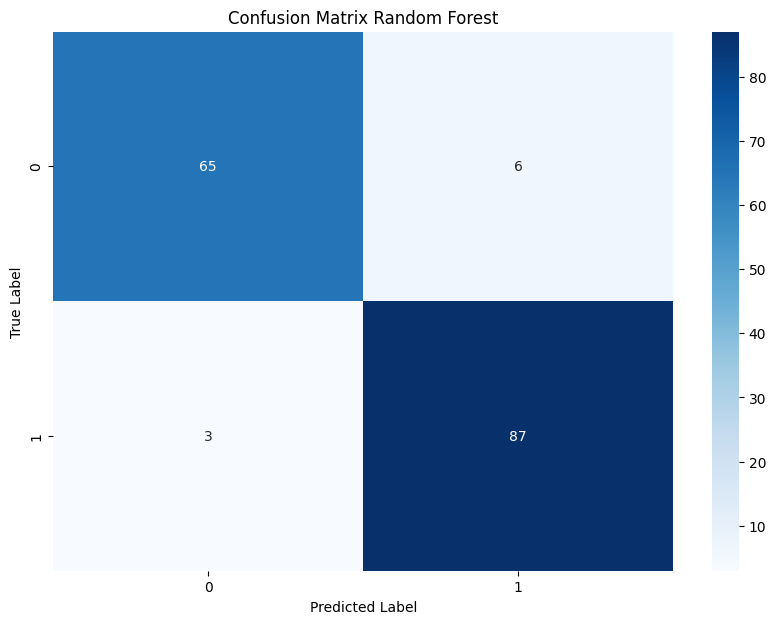

In [97]:
confussion_matrix(y_test, y_pred_best_rf, "Random Forest")

In [98]:
accuracy_scoring(best_rf_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 1.00
Akurasi pada data pengujian: 0.94


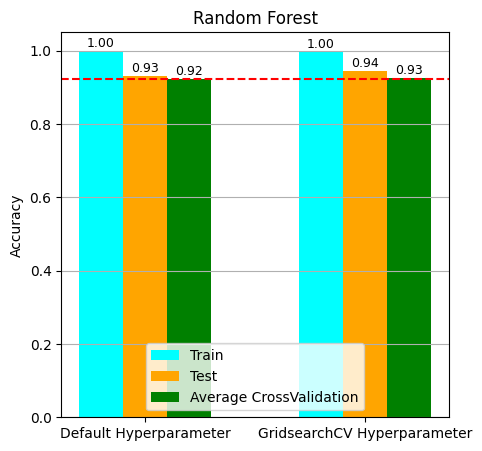

In [99]:
model_comp_plot("Random Forest", rf_model, best_rf_model, test_model(rf_model), grid_search.best_score_)

Model yang dilatih menggunakan hyparameter optimal memberikan Crossvalidation accuracy yang lebih besar dibandingkan model yang menggunakan hyperparameter default sehingga model yang terbaru dipilih

In [100]:
Train_accuracy['RF']=accuracy_score(y_train, best_rf_model.predict(X_train))
Test_accuracy['RF']=accuracy_score(y_test, best_rf_model.predict(X_test))
CrossValidation_accuracy['RF']= grid_search.best_score_

In [101]:
data['RF'] = best_rf_model.predict(X_scaled)

##Gradient Boosting

In [102]:
# Membuat model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
print("Cross-Validation Score:", test_model(gb_model))

Cross-Validation Score: 0.9125


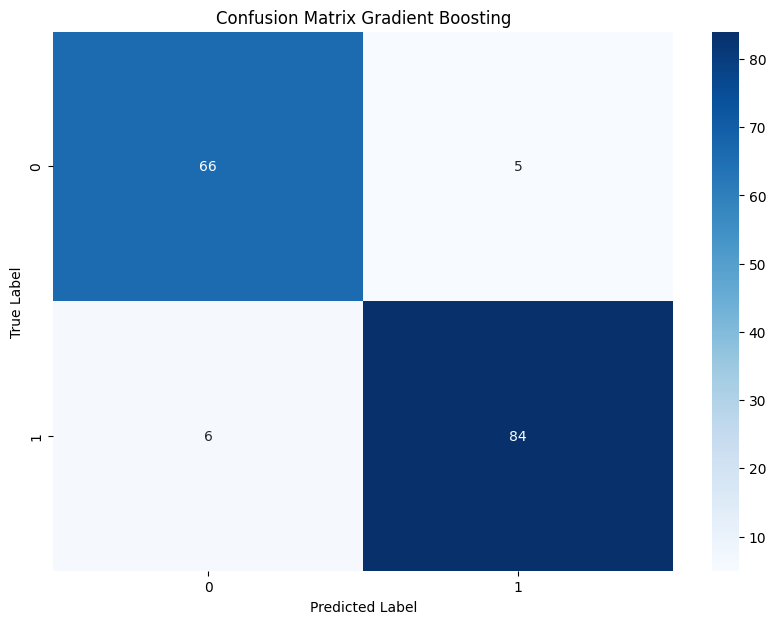

In [103]:

# Melatih model dengan data pelatihan
gb_model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred_gb = gb_model.predict(X_test)

confussion_matrix(y_test, y_pred_gb, "Gradient Boosting")

In [104]:

# Menghitung classification report untuk Gradient Boosting
report_gb = classification_report(y_test, y_pred_gb)
print("Classification Report Gradient Boosting:")
print(report_gb)


Classification Report Gradient Boosting:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        71
           1       0.94      0.93      0.94        90

    accuracy                           0.93       161
   macro avg       0.93      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161



In [105]:
accuracy_scoring(gb_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 1.00
Akurasi pada data pengujian: 0.93


In [106]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Jumlah pohon
    'learning_rate': [0.01, 0.1, 0.2],  # Laju pembelajaran
    'max_depth': [3, 5, 7],  # Kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk split node
    'min_samples_leaf': [1, 2, 4],  # Jumlah minimum sampel per leaf node
    'subsample': [0.8, 1.0]  # Fraksi sampel yang digunakan untuk membangun setiap pohon
}
gb_model_cv = GradientBoostingClassifier(random_state=42)
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=gb_model_cv, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)

# Melatih model menggunakan GridSearchCV
start_sk = time.time()
grid_search.fit(X_train, y_train)
end_sk = time.time()

sk_duration = end_sk - start_sk
print(f"sklearn GridSearchCV training time: {sk_duration:.2f} seconds")

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menampilkan model terbaik berdasarkan hyperparameter yang ditemukan
best_gb_model = grid_search.best_estimator_
print("Best Gradient Boosting Model:", best_gb_model)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
sklearn GridSearchCV training time: 911.74 seconds
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 0.8}
Best Gradient Boosting Model: GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_split=5,
                           n_estimators=150, random_state=42, subsample=0.8)
Best Cross-Validation Score: 0.95


In [107]:
y_pred_best_gb = best_gb_model.predict(X_test)
# Menghitung classification report
best_gb_report = classification_report(y_test, y_pred_best_gb)

print("\nClassification Report:")
print(best_gb_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.97      0.99      0.98        90

    accuracy                           0.98       161
   macro avg       0.98      0.97      0.97       161
weighted avg       0.98      0.98      0.98       161



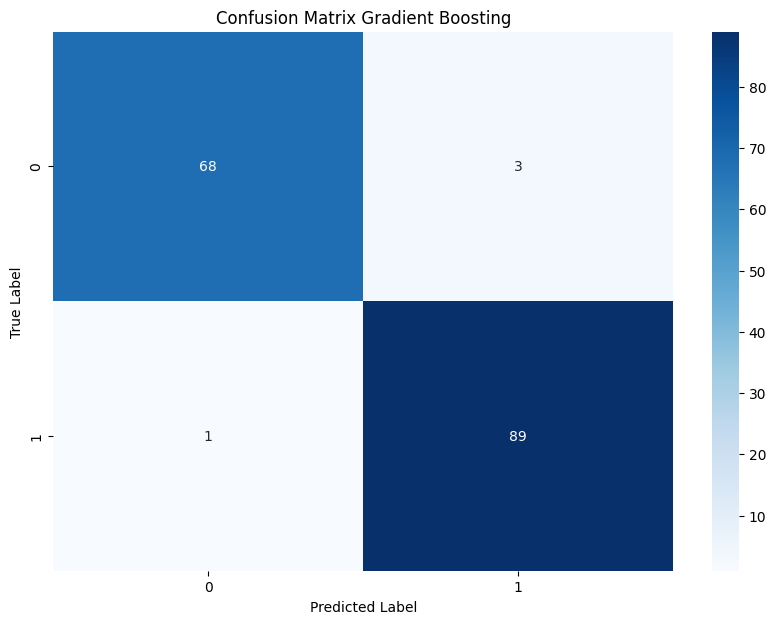

In [108]:
confussion_matrix(y_test, y_pred_best_gb, "Gradient Boosting")

In [109]:
accuracy_scoring(best_gb_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 1.00
Akurasi pada data pengujian: 0.98


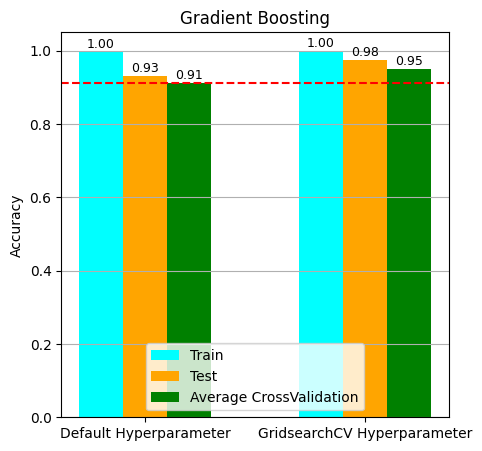

In [110]:
model_comp_plot("Gradient Boosting", gb_model, best_gb_model, test_model(gb_model), grid_search.best_score_)

In [111]:
Train_accuracy['GB']=accuracy_score(y_train, best_gb_model.predict(X_train))
Test_accuracy['GB']=accuracy_score(y_test, best_gb_model.predict(X_test))
CrossValidation_accuracy['GB']= grid_search.best_score_

Model yang dilatih menggunakan hyparameter optimal memberikan Crossvalidation accuracy yang lebih besar dibandingkan model yang menggunakan hyperparameter default sehingga model yang terbaru dipilih, namun masih terjadi overfitting

In [112]:
data['GB'] = best_gb_model.predict(X_scaled)

##Naive Bayes

In [113]:
# Membuat model Naive Bayes
nb_model = GaussianNB()
print("Cross-Validation Score:", test_model(nb_model))

Cross-Validation Score: 0.8375


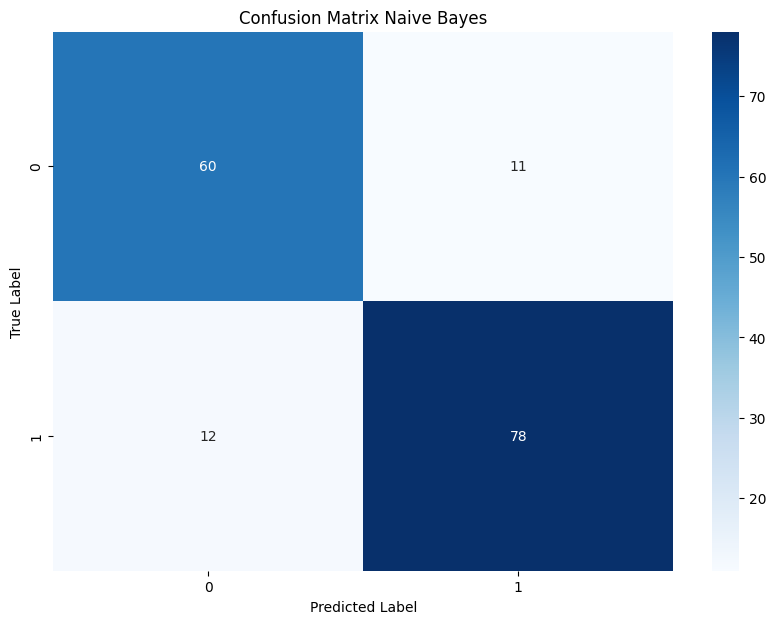

In [114]:

# Melatih model dengan data pelatihan
nb_model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred_nb = nb_model.predict(X_test)

confussion_matrix(y_test, y_pred_nb, "Naive Bayes")

In [115]:

# Menghitung classification report untuk Naive Bayes
report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report Naive Bayes:")
print(report_nb)


Classification Report Naive Bayes:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        71
           1       0.88      0.87      0.87        90

    accuracy                           0.86       161
   macro avg       0.85      0.86      0.86       161
weighted avg       0.86      0.86      0.86       161



In [116]:
accuracy_scoring(nb_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 0.84
Akurasi pada data pengujian: 0.86


In [117]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
nb_model_cv = GaussianNB()
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=nb_model_cv, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)

# Melatih model menggunakan GridSearchCV
start_sk = time.time()
grid_search.fit(X_train, y_train)
end_sk = time.time()

sk_duration = end_sk - start_sk
print(f"sklearn GridSearchCV training time: {sk_duration:.2f} seconds")

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menampilkan model terbaik berdasarkan hyperparameter yang ditemukan
best_nb_model = grid_search.best_estimator_
print("Best Naive Bayes Model:", best_nb_model)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
sklearn GridSearchCV training time: 0.17 seconds
Best Hyperparameters: {'var_smoothing': 1e-09}
Best Naive Bayes Model: GaussianNB()
Best Cross-Validation Score: 0.8375


model naive bayes yang dibuat menggunakan parameter default sudah optimal, sehingga parameter tuning mengembalikan parameter yang digunakan model pertama kali

In [118]:
Train_accuracy['NB']=accuracy_score(y_train, best_nb_model.predict(X_train))
Test_accuracy['NB']=accuracy_score(y_test, best_nb_model.predict(X_test))
CrossValidation_accuracy['NB']= test_model(best_nb_model)

In [119]:
data['NB'] = best_nb_model.predict(X_scaled)

##Adaboost

In [120]:
base_estimator = DecisionTreeClassifier(random_state=42, max_depth=1)
# Membuat model AdaBoost
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
print("Cross-Validation Score:", test_model(ada_model))

Cross-Validation Score: 0.853125


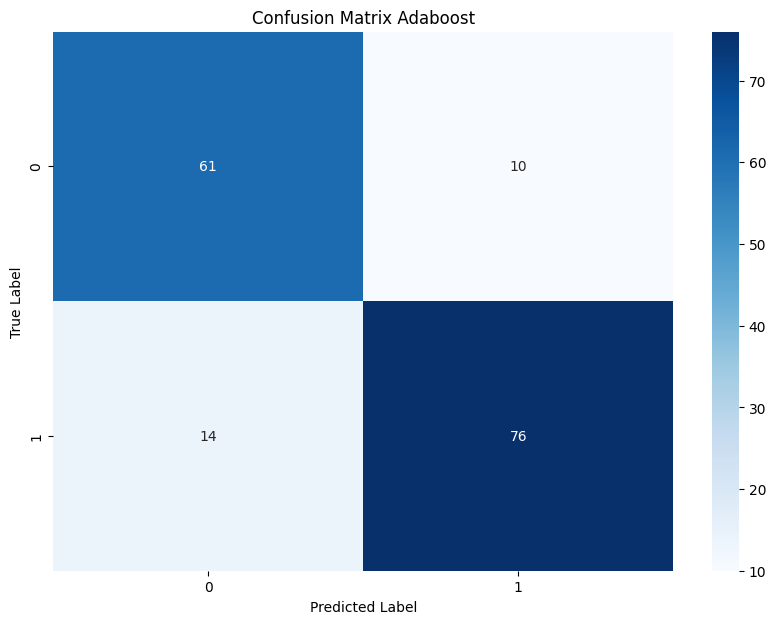

In [121]:

# Melatih model dengan data pelatihan
ada_model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred_ada = ada_model.predict(X_test)

confussion_matrix(y_test, y_pred_ada, "Adaboost")

In [122]:

# Menghitung classification report untuk AdaBoost
report_ada = classification_report(y_test, y_pred_ada)
print("Classification Report AdaBoost:")
print(report_ada)


Classification Report AdaBoost:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        71
           1       0.88      0.84      0.86        90

    accuracy                           0.85       161
   macro avg       0.85      0.85      0.85       161
weighted avg       0.85      0.85      0.85       161



In [123]:
accuracy_scoring(ada_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 0.90
Akurasi pada data pengujian: 0.85


In [124]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Jumlah estimator
    'learning_rate': [0.01, 0.1, 1.0],  # Laju pembelajaran
    'estimator__max_depth': [1, 2, 3],  # Kedalaman maksimum pohon dalam base estimator
    'estimator__min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk split node
    'estimator__min_samples_leaf': [1, 2, 4]  # Jumlah minimum sampel per leaf node
}

base_estimator = DecisionTreeClassifier(random_state=42, max_depth=1)
# Membuat model AdaBoost
ada_model_cv = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=ada_model_cv, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Melatih model menggunakan GridSearchCV
start_sk = time.time()
grid_search.fit(X_train, y_train)
end_sk = time.time()

sk_duration = end_sk - start_sk
print(f"sklearn GridSearchCV training time: {sk_duration:.2f} seconds")

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menampilkan model terbaik berdasarkan hyperparameter yang ditemukan
best_ada_model = grid_search.best_estimator_
print("Best AdaBoost Model:", best_ada_model)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
sklearn GridSearchCV training time: 344.70 seconds
Best Hyperparameters: {'estimator__max_depth': 3, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'learning_rate': 1.0, 'n_estimators': 150}
Best AdaBoost Model: AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    random_state=42),
                   n_estimators=150, random_state=42)
Best Cross-Validation Score: 0.9625


In [125]:
# Membuat prediksi dengan data uji
y_pred_best_ada = best_ada_model.predict(X_test)

# Menghitung classification report untuk AdaBoost
report_best_ada = classification_report(y_test, y_pred_best_ada)
print("Classification Report AdaBoost:")
print(report_best_ada)



Classification Report AdaBoost:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.97      0.97      0.97        90

    accuracy                           0.96       161
   macro avg       0.96      0.96      0.96       161
weighted avg       0.96      0.96      0.96       161



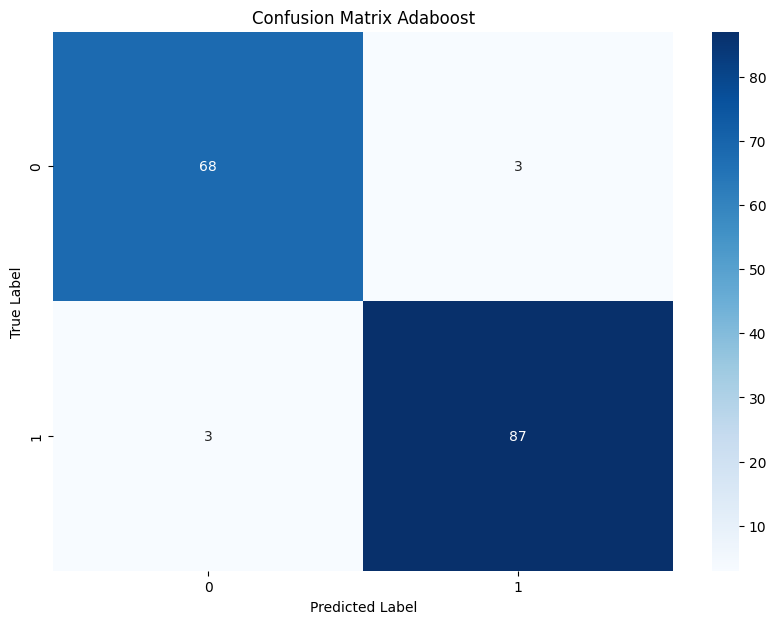

In [126]:
confussion_matrix(y_test, y_pred_best_ada, "Adaboost")

In [127]:
accuracy_scoring(best_ada_model, X_train, y_train, X_test, y_test)

Akurasi pada data pelatihan: 1.00
Akurasi pada data pengujian: 0.96


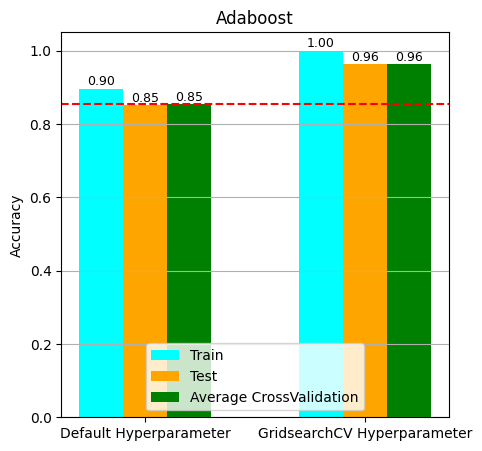

In [128]:
model_comp_plot("Adaboost", ada_model, best_ada_model, test_model(ada_model), grid_search.best_score_)

Model yang dilatih menggunakan hyparameter optimal memberikan Crossvalidation accuracy yang lebih besar dibandingkan model yang menggunakan hyperparameter default sehingga model yang terbaru dipilih, namun terjadi overfitting

In [129]:
Train_accuracy['ADA']=accuracy_score(y_train, best_ada_model.predict(X_train))
Test_accuracy['ADA']=accuracy_score(y_test, best_ada_model.predict(X_test))
CrossValidation_accuracy['ADA']= grid_search.best_score_

In [130]:
data['ADA'] = best_ada_model.predict(X_scaled)

#Deep Learning

In [131]:
# Split training+validation menjadi training dan validation set
X_train_nn, X_val, y_train_nn, y_val = train_test_split(X_train, y_train,
                                                                test_size=0.2,  # 20% dari data training+validation sebagai validation set
                                                                stratify=y_train,
                                                                random_state=42)

X_train_nn=X_train_nn.reset_index(drop=True)
y_train_nn=y_train_nn.reset_index(drop=True)

X_val=X_val.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)


X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

# Mengubah label menjadi dimulai dari 0
y_train_nn = y_train_nn
y_val = y_val
y_test = y_test

In [132]:
# Membangun model neural network sederhana untuk klasifikasi multiclass
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')  # Output layer untuk 3 kelas
])

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Menggunakan EarlyStopping untuk menghentikan training jika model tidak membaik
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



# Melatih model
history = model.fit(X_train_nn, y_train_nn,
                    epochs=500,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6151 - loss: 0.6708 - val_accuracy: 0.8125 - val_loss: 0.5646
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7674 - loss: 0.5514 - val_accuracy: 0.8281 - val_loss: 0.4786
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8478 - loss: 0.4475 - val_accuracy: 0.8281 - val_loss: 0.4216
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8377 - loss: 0.4068 - val_accuracy: 0.8516 - val_loss: 0.3918
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8489 - loss: 0.3576 - val_accuracy: 0.8516 - val_loss: 0.3729
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8425 - loss: 0.3474 - val_accuracy: 0.8672 - val_loss: 0.3580
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8486 - loss: 0.3258 - val_accuracy: 0.8672 - val_loss: 0.3529
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8804 - loss: 0.2982 - val_accuracy: 0.8

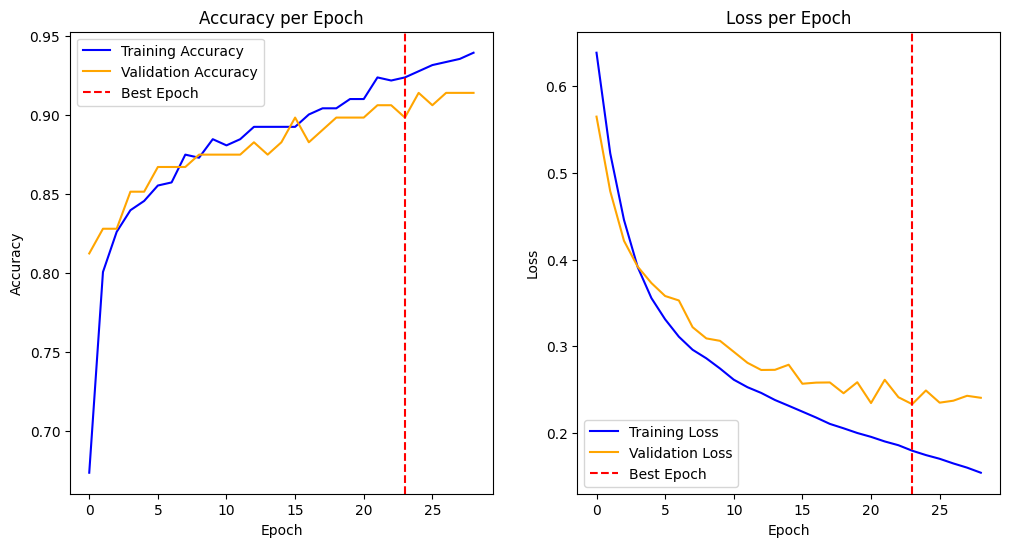

In [133]:
# Plot akurasi training dan validasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.axvline(x=early_stopping.best_epoch, color='red', linestyle='--', label='Best Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()  # Menampilkan legenda

# Plot loss training dan validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.axvline(x=early_stopping.best_epoch, color='red', linestyle='--', label='Best Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()  # Menampilkan legenda

plt.show()

In [134]:
# Menampilkan epoch terbaik dari Early Stopping
print(f"Epoch terbaik berdasarkan validasi loss: {early_stopping.best_epoch}")

Epoch terbaik berdasarkan validasi loss: 23


In [135]:
# Evaluasi model pada data test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Membuat prediksi pada data test
y_pred_nn_prob = model.predict(X_test)
y_pred_nn = tf.argmax(y_pred_nn_prob, axis=1).numpy()  # Mengambil label dengan probabilitas tertinggi


6/6 - 0s - 34ms/step - accuracy: 0.8944 - loss: 0.2606
Test Accuracy: 0.8944
Test Loss: 0.2606
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [136]:
# Menghitung classification report untuk Neural Network
report_nn = classification_report(y_test+1, y_pred_nn+1)
print("Classification Report Neural Network:")
print(report_nn)

Classification Report Neural Network:
              precision    recall  f1-score   support

           1       0.89      0.87      0.88        71
           2       0.90      0.91      0.91        90

    accuracy                           0.89       161
   macro avg       0.89      0.89      0.89       161
weighted avg       0.89      0.89      0.89       161



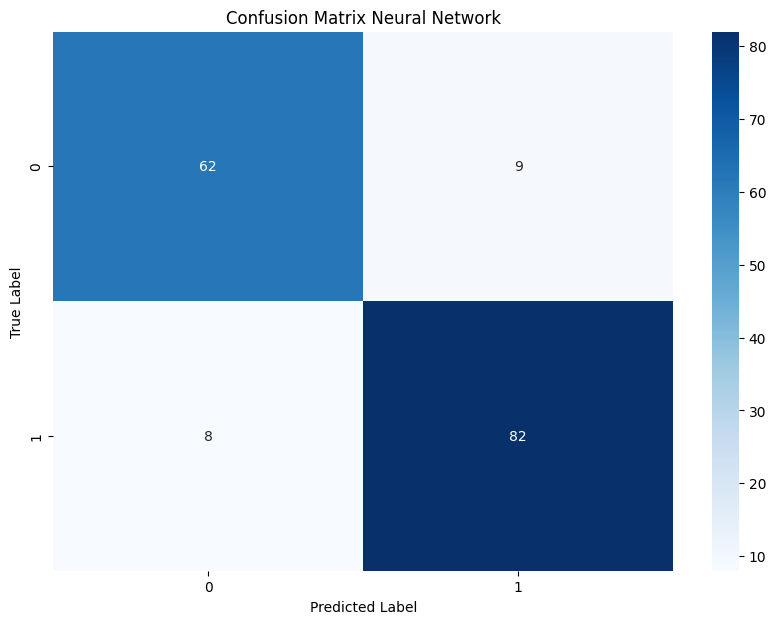

In [137]:
confussion_matrix(y_test, y_pred_nn, "Neural Network")

In [138]:
# Evaluasi model pada data test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Membuat prediksi pada data test
y_pred_nn_prob = model.predict(X_test)
y_pred_nn = tf.argmax(y_pred_nn_prob, axis=1).numpy()  # Mengambil label dengan probabilitas tertinggi


6/6 - 0s - 8ms/step - accuracy: 0.8944 - loss: 0.2606
Test Accuracy: 0.8944
Test Loss: 0.2606
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [139]:
# Melakukan prediksi pada data pelatihan
y_train_pred_prob = model.predict(X_train_nn)
y_train_pred=tf.argmax(y_train_pred_prob, axis=1).numpy()
# Menghitung akurasi pada data pelatihan
train_accuracy = accuracy_score(y_train_nn, y_train_pred)
print(f"Akurasi pada data pelatihan: {train_accuracy:}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Akurasi pada data pelatihan: 0.935546875


In [140]:
# Melakukan prediksi pada data uji
y_test_pred_prob = model.predict(X_test)
y_test_pred=tf.argmax(y_test_pred_prob, axis=1).numpy()
# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Akurasi pada data uji: {test_accuracy:}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Akurasi pada data uji: 0.8944099378881988


In [141]:
# Parameter untuk k-fold
k = 5  # Jumlah lipatan
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Menyimpan hasil dari setiap fold
fold_accuracies = []

# Loop untuk setiap fold
for train_index, val_index in kf.split(X_train, y_train):
    # Membagi data menjadi training dan validation set berdasarkan indeks dari KFold
    X_train_nn, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_nn, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    y_train_nn
    y_val
    # Membangun kembali model neural network untuk setiap fold
    model = Sequential([
        Input(shape=(X_train_nn.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(2, activation='sigmoid')  # Output layer untuk 3 kelas
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # EarlyStopping untuk menghentikan training jika tidak ada perbaikan
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Melatih model
    history = model.fit(X_train_nn, y_train_nn,
                        epochs=100,  # Anda dapat mengurangi epoch jika waktu training terlalu lama
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping],
                        verbose=0)  # Sembunyikan output selama training

    # Evaluasi pada data validasi
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_accuracy)

# Menampilkan hasil cross-validation
print(f"Accuracy per fold: {fold_accuracies}")
print(f"Average accuracy: {np.mean(fold_accuracies):.4f}")

Accuracy per fold: [0.9140625, 0.875, 0.9296875, 0.9140625, 0.9296875]
Average accuracy: 0.9125


##Deep learning tuning

In [142]:
from kerastuner import RandomSearch

# Membangun model neural network untuk Keras Tuner
def build_model(hp):
    model = Sequential()

    # Layer pertama dengan pilihan unit dan fungsi aktivasi
    model.add(Dense(units=hp.Int('units_layer_1', min_value=32, max_value=128, step=32),
                    activation=hp.Choice('activation_layer_1', values=['relu', 'tanh']),
                    input_shape=(X_train_scaled.shape[1],)))

    # Layer kedua dengan pilihan unit dan fungsi aktivasi
    model.add(Dense(units=hp.Int('units_layer_2', min_value=16, max_value=64, step=16),
                    activation=hp.Choice('activation_layer_2', values=['relu', 'tanh'])))

    # Dropout layer untuk mencegah overfitting
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(2, activation='sigmoid'))

    # Kompilasi model
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

# Inisialisasi Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Jumlah percobaan kombinasi hyperparameter
    executions_per_trial=3,  # Setiap percobaan diulang 3 kali
    directory='my_dir',
    project_name='keras_tuner_demo'
)

# Menggunakan EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melakukan pencarian hyperparameter
tuner.search(X_train_nn, y_train_nn,
             epochs=50,
             validation_data=(X_val, y_val),
             callbacks=[early_stopping],
             batch_size=32)

# Menampilkan hasil terbaik
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Membuat model terbaik
best_model = tuner.hypermodel.build(best_hps)

# Melatih model terbaik
history = best_model.fit(X_train_nn, y_train_nn,
                         epochs=200,
                         validation_data=(X_val, y_val),
                         callbacks=[early_stopping],
                         batch_size=32)

Trial 10 Complete [00h 00m 39s]
val_accuracy: 0.8984375

Best val_accuracy So Far: 0.9348958333333334
Total elapsed time: 00h 06m 10s
Best Hyperparameters: {'units_layer_1': 96, 'activation_layer_1': 'relu', 'units_layer_2': 32, 'activation_layer_2': 'relu', 'dropout_rate': 0.4, 'learning_rate': 0.001}
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4379 - loss: 0.7342 - val_accuracy: 0.7344 - val_loss: 0.6113
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6997 - loss: 0.6091 - val_accuracy: 0.8281 - val_loss: 0.5157
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7658 - loss: 0.5446 - val_accuracy: 0.8828 - val_loss: 0.4412
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8007 - loss: 0.4929 - val_accuracy: 0.8984 - val_loss: 0.3911
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8405 - loss: 0.4404 - val_accuracy: 0.8984 - val_loss: 0.3471
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8245 - loss: 0.4131 - val_accuracy: 0.8984 - val_loss: 0.3263
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8392 - loss: 0.3904 - val_accuracy: 0.9062 - val_loss: 0.3105
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8687 - loss: 0.3318 - val_accuracy: 0.8984 - val_lo

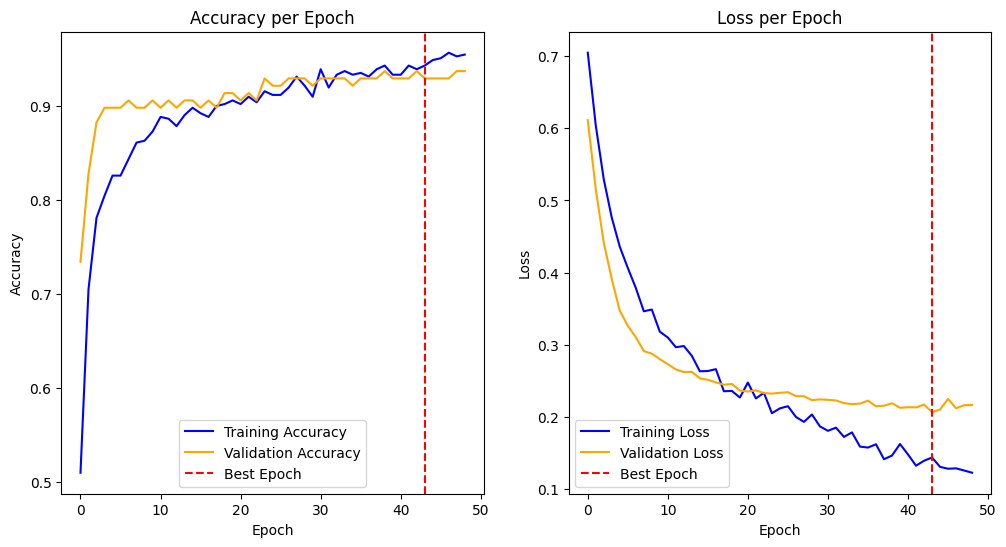

In [143]:
# Plot akurasi training dan validasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.axvline(x=early_stopping.best_epoch, color='red', linestyle='--', label='Best Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()  # Menampilkan legenda

# Plot loss training dan validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.axvline(x=early_stopping.best_epoch, color='red', linestyle='--', label='Best Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()  # Menampilkan legenda

plt.show()

In [144]:
# Menampilkan epoch terbaik dari Early Stopping
print(f"Epoch terbaik berdasarkan validasi loss: {early_stopping.best_epoch}")

Epoch terbaik berdasarkan validasi loss: 43


In [145]:
# Evaluasi model pada data test
best_test_loss, best_test_accuracy = best_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Test Loss: {best_test_loss:.4f}")

# Membuat prediksi pada data test
y_pred_best_nn_prob = best_model.predict(X_test)
y_pred_best_nn = tf.argmax(y_pred_best_nn_prob, axis=1).numpy()  # Mengambil label dengan probabilitas tertinggi


6/6 - 0s - 32ms/step - accuracy: 0.9006 - loss: 0.2264
Test Accuracy: 0.9006
Test Loss: 0.2264
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [146]:
# Melakukan prediksi pada data pelatihan
y_train_best_pred_prob = best_model.predict(X_train_nn)
y_train_pred_best=tf.argmax(y_train_best_pred_prob, axis=1).numpy()
# Menghitung akurasi pada data pelatihan
best_train_accuracy = accuracy_score(y_train_nn, y_train_pred_best)
print(f"Akurasi pada data pelatihan: {best_train_accuracy:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Akurasi pada data pelatihan: 0.96


In [147]:
# Menghitung classification report untuk Neural Network
report_best_nn = classification_report(y_test+1, y_pred_best_nn+1)
print("Classification Report Neural Network:")
print(report_best_nn)

Classification Report Neural Network:
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        71
           2       0.91      0.91      0.91        90

    accuracy                           0.90       161
   macro avg       0.90      0.90      0.90       161
weighted avg       0.90      0.90      0.90       161



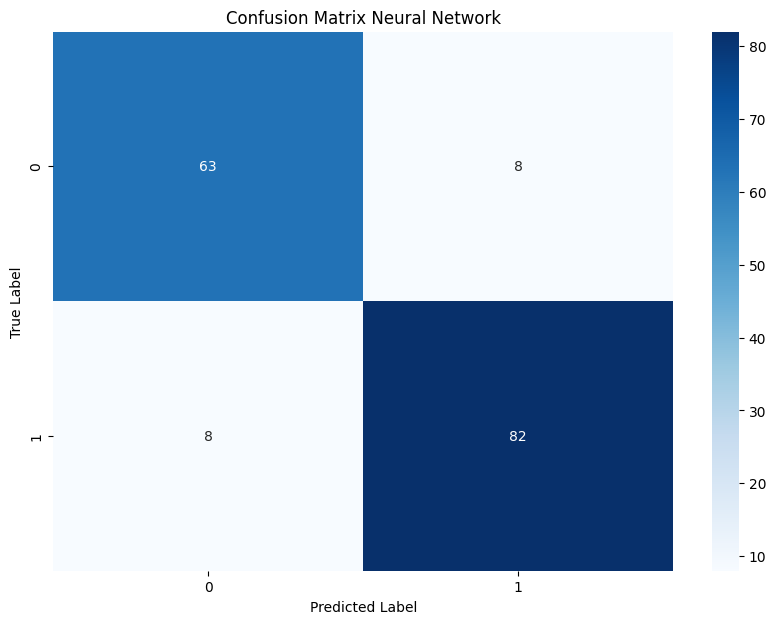

In [148]:
confussion_matrix(y_test, y_pred_best_nn, "Neural Network")

In [149]:
# Jumlah lipatan untuk k-fold
k = 5  # Misalnya 5 lipatan
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Menyimpan skor akurasi di setiap fold
fold_accuracies = []

# Loop untuk setiap fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Fold {fold + 1}/{k}")

    # Membagi data berdasarkan indeks fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Melatih model terbaik pada data training dari fold ini
    best_model.fit(X_train_fold, y_train_fold,
                   epochs=50,  # Gunakan jumlah epoch yang kecil agar tidak overfit
                   validation_data=(X_val_fold, y_val_fold),
                   batch_size=32,
                   verbose=0)

    # Evaluasi performa model pada data validasi fold ini
    val_loss, val_accuracy = best_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold + 1} - Accuracy: {val_accuracy:.4f}")
    fold_accuracies.append(val_accuracy)

# Menampilkan hasil akhir cross-validation
print(f"Accuracy per fold: {fold_accuracies}")
print(f"Average accuracy: {np.mean(fold_accuracies):.4f}")

Fold 1/5
Fold 1 - Accuracy: 0.9453
Fold 2/5
Fold 2 - Accuracy: 0.9375
Fold 3/5
Fold 3 - Accuracy: 0.9922
Fold 4/5
Fold 4 - Accuracy: 0.9844
Fold 5/5
Fold 5 - Accuracy: 0.9922
Accuracy per fold: [0.9453125, 0.9375, 0.9921875, 0.984375, 0.9921875]
Average accuracy: 0.9703


Model yang dilatih menggunakan hyparameter optimal memberikan Crossvalidation accuracy yang lebih besar dibandingkan model yang menggunakan hyperparameter default sehingga model yang terbaru dipilih

In [150]:
Train_accuracy['NN']=best_train_accuracy
Test_accuracy['NN']=best_test_accuracy
CrossValidation_accuracy['NN']= np.mean(fold_accuracies)

In [151]:
# Membuat prediksi probabilitas pada seluruh data
y_pred_prob = model.predict(X_scaled)

# Mengubah probabilitas menjadi label kelas
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()  # Mengambil label dengan probabilitas tertinggi
# Memperbarui DataFrame 'data' dengan label prediksi
data['NN'] = y_pred


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


#Overall Result

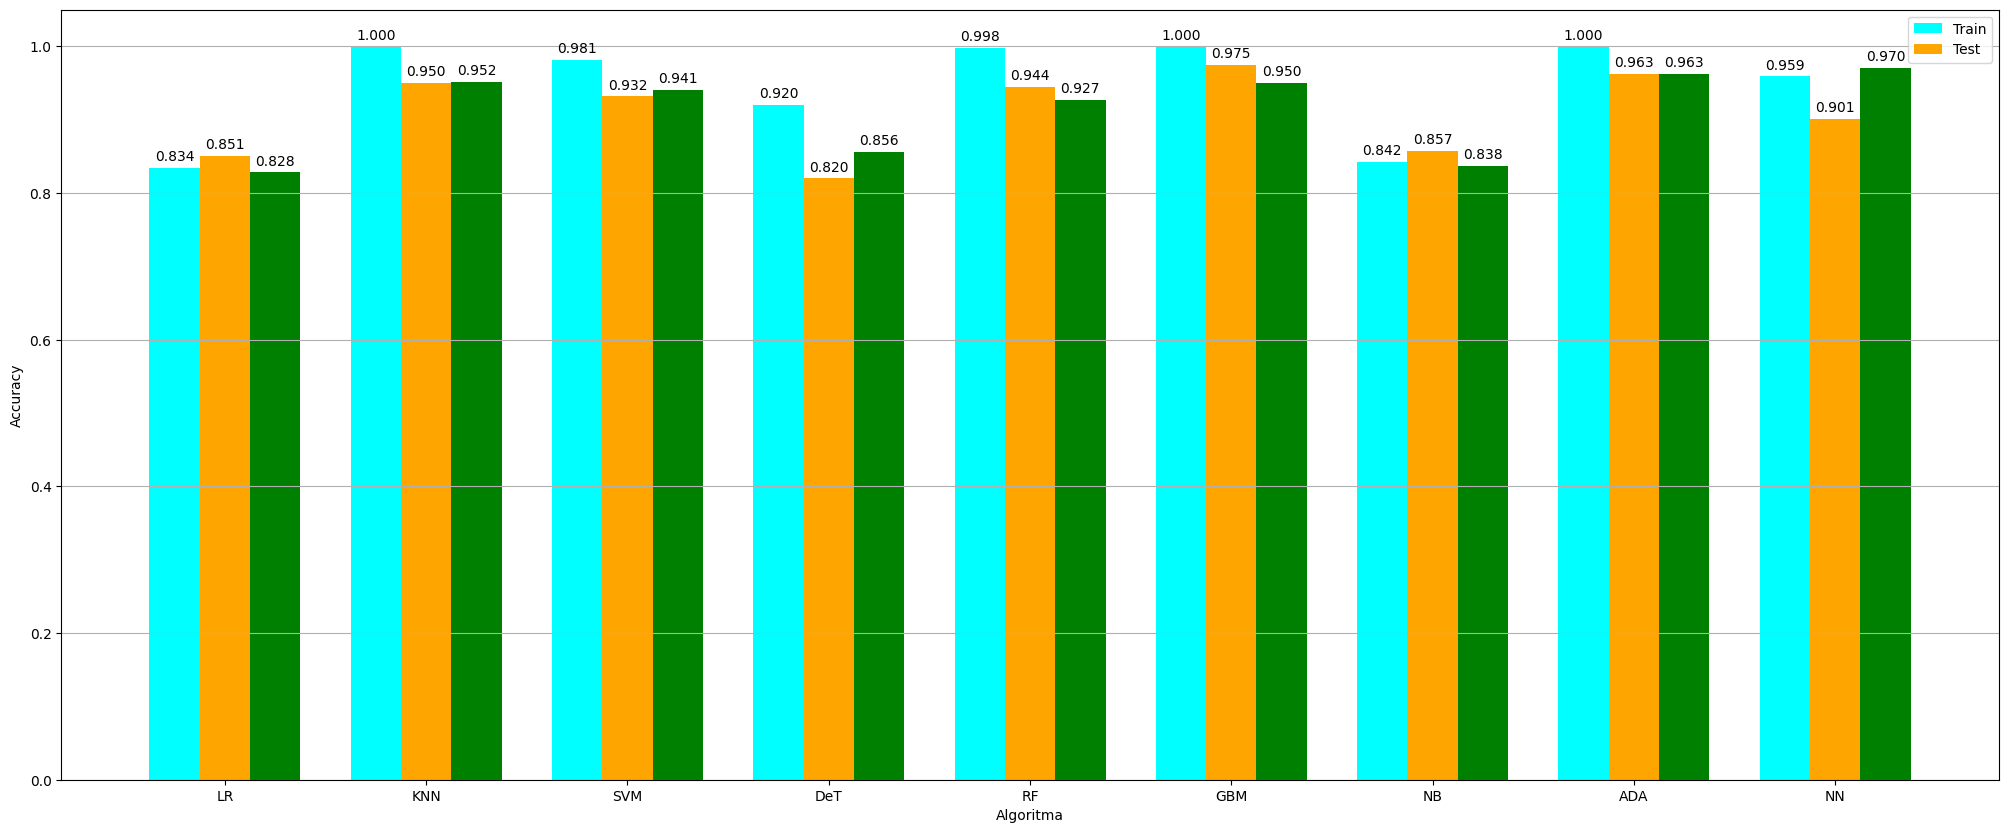

In [152]:
Train_Accuracy = list(Train_accuracy.values())
Test_Accuracy = list(Test_accuracy.values())
CrossValidation_Accuracy = list(CrossValidation_accuracy.values())

x_p = np.arange(9)
width = 0.25

plt.figure(figsize=(25,10))
bars1 = plt.bar(x_p-0.25, Train_Accuracy, width, color='cyan')
bars2 = plt.bar(x_p, Test_Accuracy, width, color='orange')
bars3 = plt.bar(x_p+0.25, CrossValidation_Accuracy, width, color='green')
plt.xticks(x_p, ['LR', 'KNN', 'SVM','DeT','RF','GBM','NB','ADA','NN'])
plt.xlabel("Algoritma")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test", "Average CrossValidation"])
plt.legend(["Train", "Test"])
plt.grid(axis = 'y')
# Function to add labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.3f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
plt.show()

In [153]:
data1=data.loc[(data['DEPT']<13000)].reset_index()

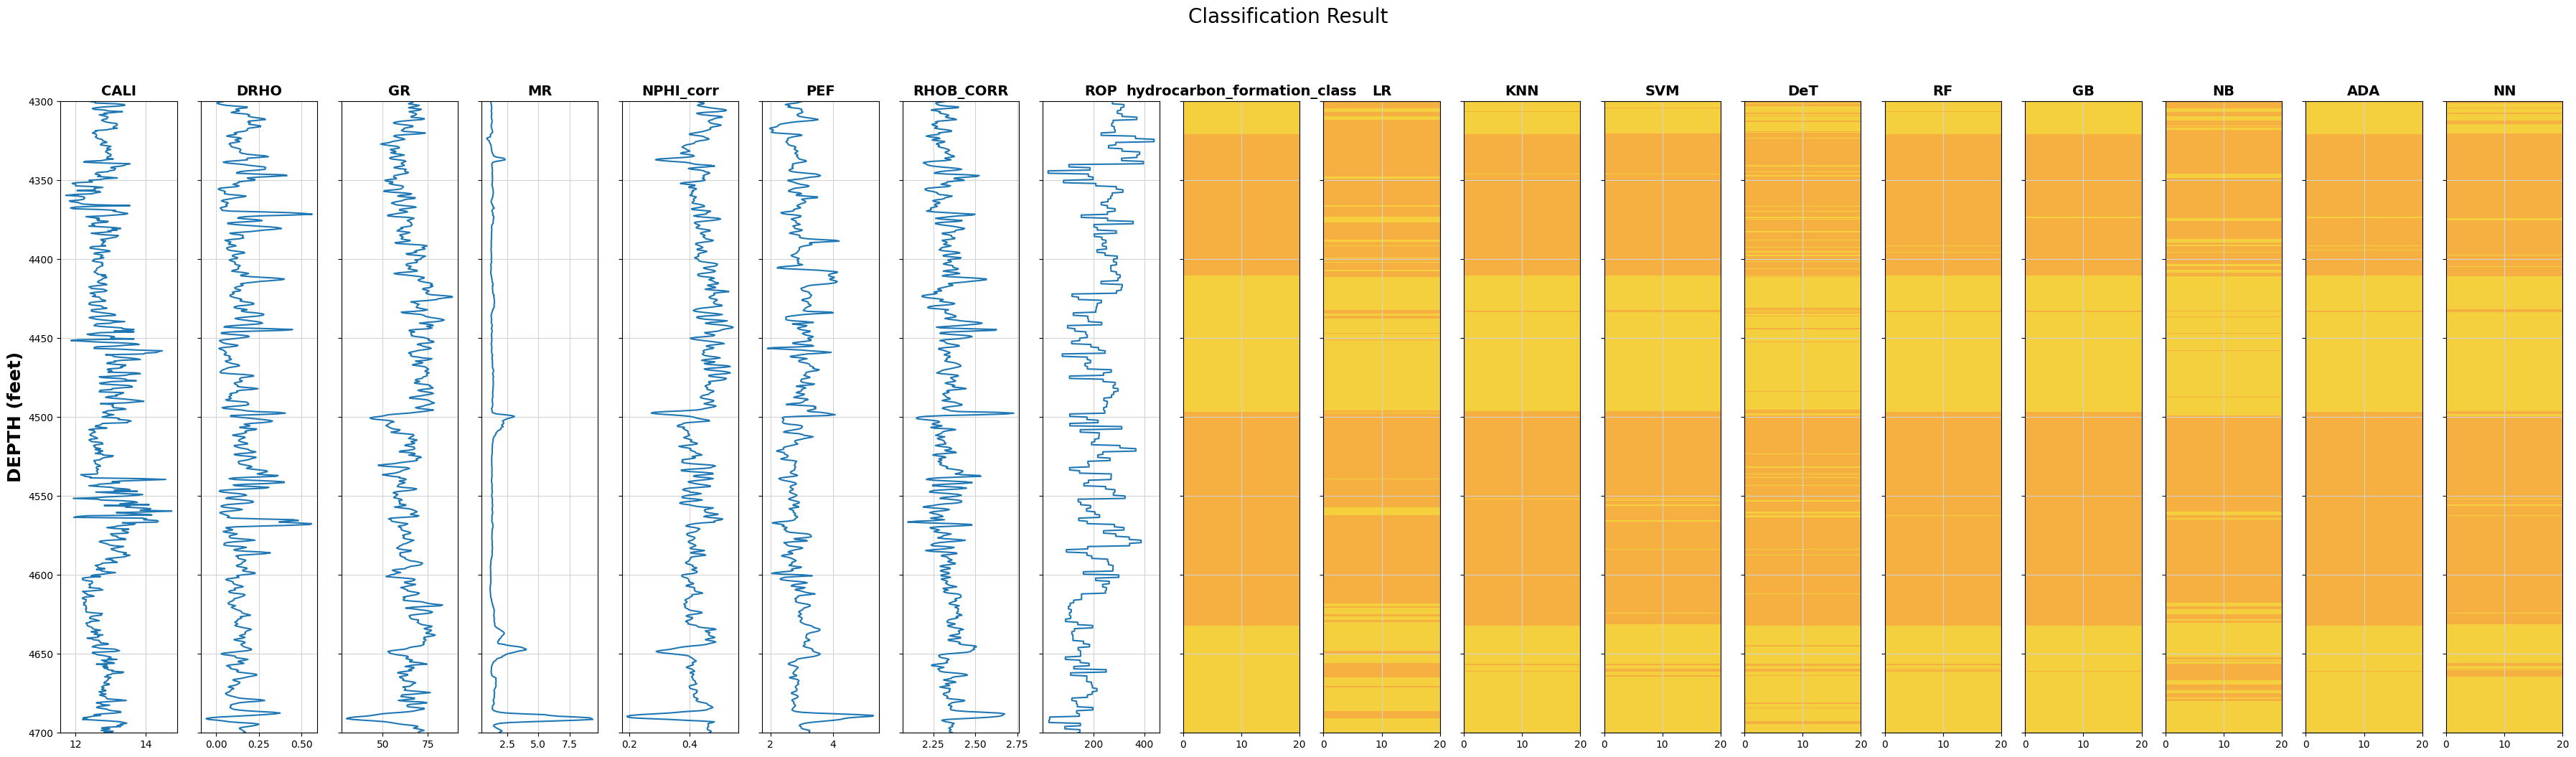

In [154]:
# Setup the curves to plot
curves_to_plot = ['CALI','DRHO','GR','MR','NPHI_corr','PEF','RHOB_CORR','ROP','hydrocarbon_formation_class', 'LR', 'KNN', 'SVM','DeT','RF','GB','NB','ADA','NN']
facies_curve=['hydrocarbon_formation_class', 'LR', 'KNN', 'SVM','DeT','RF','GB','NB','ADA','NN']


# Create plot



cmap_facies = create_plot(
            data1,
            curves_to_plot,
            data1['DEPT'],
            False,
            facies_curve
            )

In [155]:
from google.colab.data_table import DataTable
DataTable.max_columns = 50
data1

,index,WELL,DEPT,CALI,DRHO,DT_MAA,GR,MR,SR,NPHI,...,PERMtimur,LR,KNN,SVM,DeT,RF,GB,NB,ADA,NN
0,0,LLB-10,4300.0,12.415,0.044,NaN,66.597,1.218,1.026,0.4272,...,3011.141846,1,0,1,1,0,0,1,0,1
1,1,LLB-10,4300.5,12.560,0.018,NaN,66.809,1.210,1.043,0.4326,...,3156.000294,1,0,0,1,0,0,1,0,1
2,2,LLB-10,4301.0,12.563,0.004,NaN,65.399,1.210,1.043,0.4481,...,2549.476977,1,0,0,1,0,0,1,0,1
3,3,LLB-10,4301.5,13.139,0.012,NaN,64.328,1.236,1.039,0.4469,...,2143.007324,1,0,0,0,0,0,1,0,0
4,4,LLB-10,4302.0,13.397,0.031,NaN,67.245,1.239,1.051,0.4317,...,3430.778118,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,796,LLB-10,4698.0,12.810,0.149,NaN,71.371,1.929,1.518,0.4603,...,7592.465054,0,0,0,0,0,0,0,0,0
797,797,LLB-10,4698.5,12.733,0.155,NaN,72.914,2.032,1.567,0.4665,...,9227.937692,0,0,0,0,0,0,0,0,0
798,798,LLB-10,4699.0,13.073,0.163,NaN,70.924,2.097,1.578,0.4723,...,6800.320933,0,0,0,0,0,0,0,0,0
799,799,LLB-10,4699.5,12.815,0.171,NaN,69.881,1.926,1.466,0.4702,...,5687.498034,0,0,0,0,0,0,0,0,0


In [156]:
end_notebook = time.time()
notebook_running_duration = end_notebook - start_notebook
print(f"Notebook running duration: {notebook_running_duration:.2f} seconds")

Notebook running duration: 2220.11 seconds


Notebook running time: 37 minutes

In [ ]:
from google.colab import runtime
runtime.unassign()